# **Data Science Assignment**

Group G

## **1. Business Understanding**

### Background
**Telecom Churn** : The phenomenon where subscribers discontinue services or switch providers in the telecommunications industry.




### Business Objectives
**Primary Goal**: Minimize customer churn to enhance revenue and customer retention efforts.

### Business Success Criteria
**Reduced Churn Rate**: Achieve a measurable reduction in the rate at which customers cease subscriptions.
<br>

**Improved Retention**: Implement effective strategies leading to a higher percentage of retained customers.

### Requirements, Assumptions, and Constraints
**Data Quality**: Assume the dataset is reliable, and there are no major issues with data quality.
<br>

**Time Constraint**: Complete the analysis within a specified timeframe.
<br>

**Assumption**: Retaining existing customers is more cost-effective than acquiring new ones.

### Costs and Benefits
**Costs**: Resources for data analysis, personnel, and potential implementation of retention strategies.
<br>

**Benefits**: Increased revenue through retained customers and cost savings compared to acquiring new customers

### 	Data Mining Goals

**Identify Churn Indicators**: Determine patterns and factors indicating potential customer churn.
<br>

**Develop Predictive Models**: Create models to anticipate customer churn based on historical data.

### Data Mining Success Criteria
**Model Accuracy**: Achieve a high level of F1 score in predicting customer churn.
<br>

**Actionable Insights**: Extract insights from the data that can inform effective retention strategies.

## **2. Data Understanding**

In [ ]:
#Load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from prettytable import PrettyTable
from scipy.signal import savgol_filter

d = pd.read_csv('/content/churn_data.csv')

###2.1. General Characterization of the Data

In [ ]:
print("Data has",d.shape[0],"rows and",d.shape[1],"attributes")

Data has 5000 rows and 18 attributes


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   churn                       5000 non-null   object 
 1   accountlength               4951 non-null   float64
 2   internationalplan           4950 non-null   object 
 3   voicemailplan               4950 non-null   object 
 4   numbervmailmessages         4950 non-null   float64
 5   totaldayminutes             4950 non-null   float64
 6   totaldaycalls               4950 non-null   float64
 7   totaldaycharge              4950 non-null   float64
 8   totaleveminutes             4950 non-null   float64
 9   totalevecalls               4950 non-null   float64
 10  totalevecharge              4950 non-null   float64
 11  totalnightminutes           4950 non-null   float64
 12  totalnightcalls             4950 non-null   float64
 13  totalnightcharge            4950 

**Variable Descriptions**

**churn:**                       discrete, binary variable (object)

**accountlength:**               continuous, numeric interval-scaled variable (float64)

**internationalplan:**           discrete, binary variable (object)

**voicemailplan:**               discrete, binary variable (object)

**numbervmailmessages:**         discrete, numeric variable, counter (float64)

**totaldayminutes:**             continuous, numeric interval-scaled variable (float64)

**totaldaycalls:**               continuous, numeric interval-scaled variable (float64)

**totaldaycharge:**              continuous, numeric ratio-scaled variable (float64)

**totaleveminutes:**             continuous, numeric interval-scaled variable (float64)

**totalevecalls:**               continuous, numeric interval-scaled variable (float64)

**totalevecharge:**              continuous, numeric ratio-scaled variable (float64)

**totalnightminutes:**           continuous, numeric interval-scaled variable (float64)

**totalnightcalls:**             continuous, numeric interval-scaled variable (float64)

**totalnightcharge:**            continuous, numeric ratio-scaled variable (float64)

**totalintlminutes:**            continuous, numeric interval-scaled variable (float64)

**totalintlcalls:**              continuous, numeric interval-scaled variable (float64)

**totalintlcharge:**             continuous, numeric ratio-scaled variable (float64)

**numbercustomerservicecalls:**  discrete, numeric variable, counter (float64)


###2.2. Preliminary Analysis (summaries, spread measures, histograms, boxplots, density)

In [ ]:
d.describe()

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,4951.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000
mean,100.238295,7.763636,180.306625,100.038788,30.629386,200.679798,100.243838,17.048293,200.465697,99.932929,9.015240,10.259010,4.432525,2.772088,1.569091
std,39.718817,13.552928,53.926625,19.844529,9.148881,50.486434,19.837380,4.300503,50.498290,19.939450,2.276812,2.763712,2.448457,0.744552,1.305279
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.700000,87.000000,24.430000,166.425000,87.000000,14.130000,167.000000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.100000,100.000000,30.600000,201.000000,101.000000,17.090000,200.550000,100.000000,9.010000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,17.000000,216.200000,113.000000,36.720000,234.100000,114.000000,19.897500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
d.count()/d.shape[0] # Completeness

churn                         1.0000
accountlength                 0.9902
internationalplan             0.9900
voicemailplan                 0.9900
numbervmailmessages           0.9900
totaldayminutes               0.9900
totaldaycalls                 0.9900
totaldaycharge                0.9900
totaleveminutes               0.9900
totalevecalls                 0.9900
totalevecharge                0.9900
totalnightminutes             0.9900
totalnightcalls               0.9900
totalnightcharge              0.9900
totalintlminutes              0.9900
totalintlcalls                0.9900
totalintlcharge               0.9900
numbercustomerservicecalls    0.9900
dtype: float64

In [ ]:
NaN_sum = list(d.index[d['churn'].isna()]) + list(d.index[d['accountlength'].isna()]) + list(d.index[d['internationalplan'].isna()]) + list(d.index[d['voicemailplan'].isna()]) + list(d.index[d['numbervmailmessages'].isna()]) + list(d.index[d['totaldayminutes'].isna()]) + list(d.index[d['totaldaycalls'].isna()]) + list(d.index[d['totaldaycharge'].isna()]) + list(d.index[d['totaleveminutes'].isna()]) + list(d.index[d['totalevecalls'].isna()]) + list(d.index[d['totalevecharge'].isna()]) + list(d.index[d['totalnightminutes'].isna()]) + list(d.index[d['totalnightcalls'].isna()]) + list(d.index[d['totalnightcharge'].isna()]) + list(d.index[d['totalintlminutes'].isna()]) + list(d.index[d['totalintlcalls'].isna()]) + list(d.index[d['totalintlcharge'].isna()]) + list(d.index[d['numbercustomerservicecalls'].isna()])
NaN_sum = sorted(NaN_sum)
print(len(NaN_sum), 'NaN values in total')
NaN_list = []
for i in NaN_sum:
    if i not in NaN_list:
        NaN_list.append(i)
print(len(NaN_list), 'rows with at least 1 NaN value')
print(793*100/5000, '% of rows contain NaN values')

849 NaN values in total
793 rows with at least 1 NaN value
15.86 % of rows contain NaN values


Summaries:
       accountlength  numbervmailmessages  totaldayminutes  totaldaycalls  \
count    4951.000000          4950.000000      4950.000000    4950.000000   
mean      100.238295             7.763636       180.306625     100.038788   
std        39.718817            13.552928        53.926625      19.844529   
min         1.000000             0.000000         0.000000       0.000000   
25%        73.000000             0.000000       143.700000      87.000000   
50%       100.000000             0.000000       180.100000     100.000000   
75%       127.000000            17.000000       216.200000     113.000000   
max       243.000000            52.000000       351.500000     165.000000   

       totaldaycharge  totaleveminutes  totalevecalls  totalevecharge  \
count     4950.000000      4950.000000    4950.000000     4950.000000   
mean        30.629386       200.679798     100.243838       17.048293   
std          9.148881        50.486434      19.837380        4.300503   
min

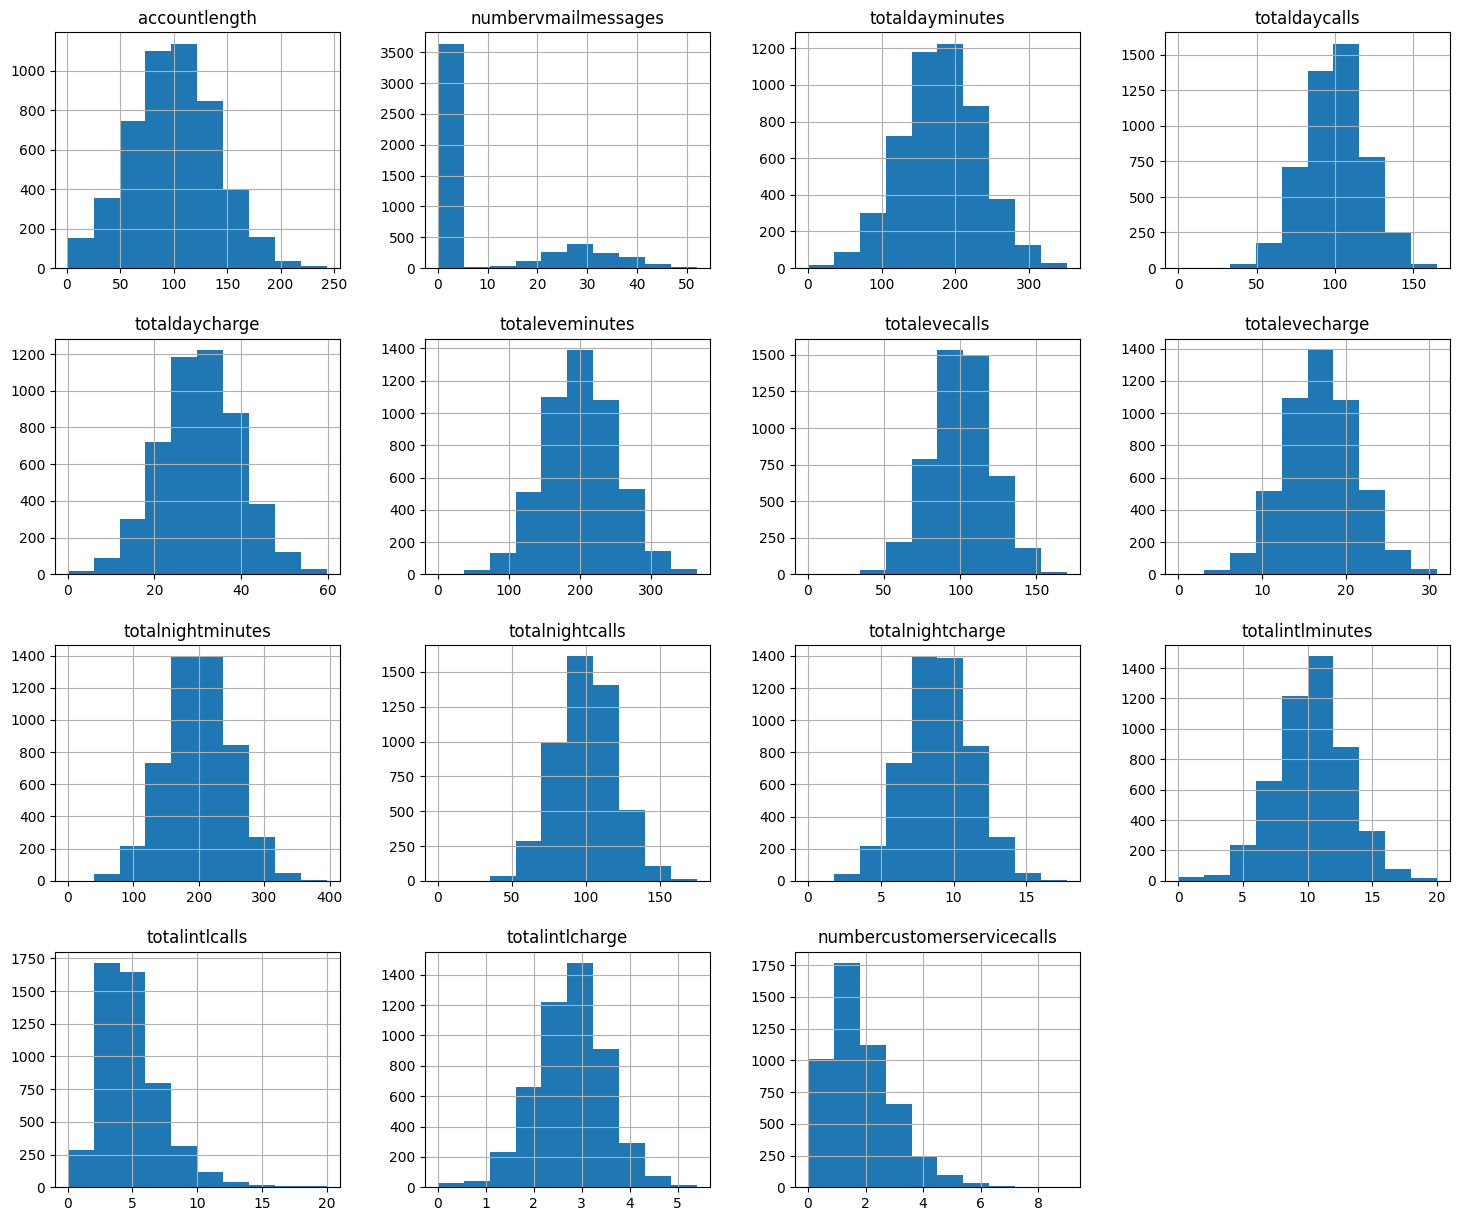

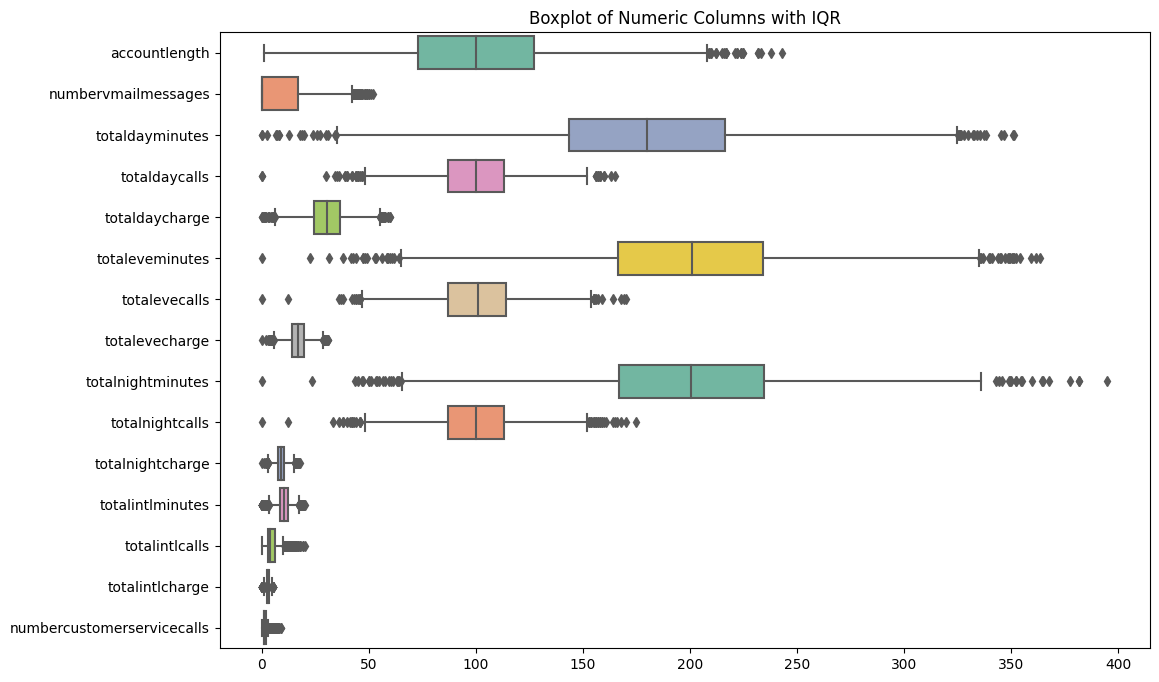

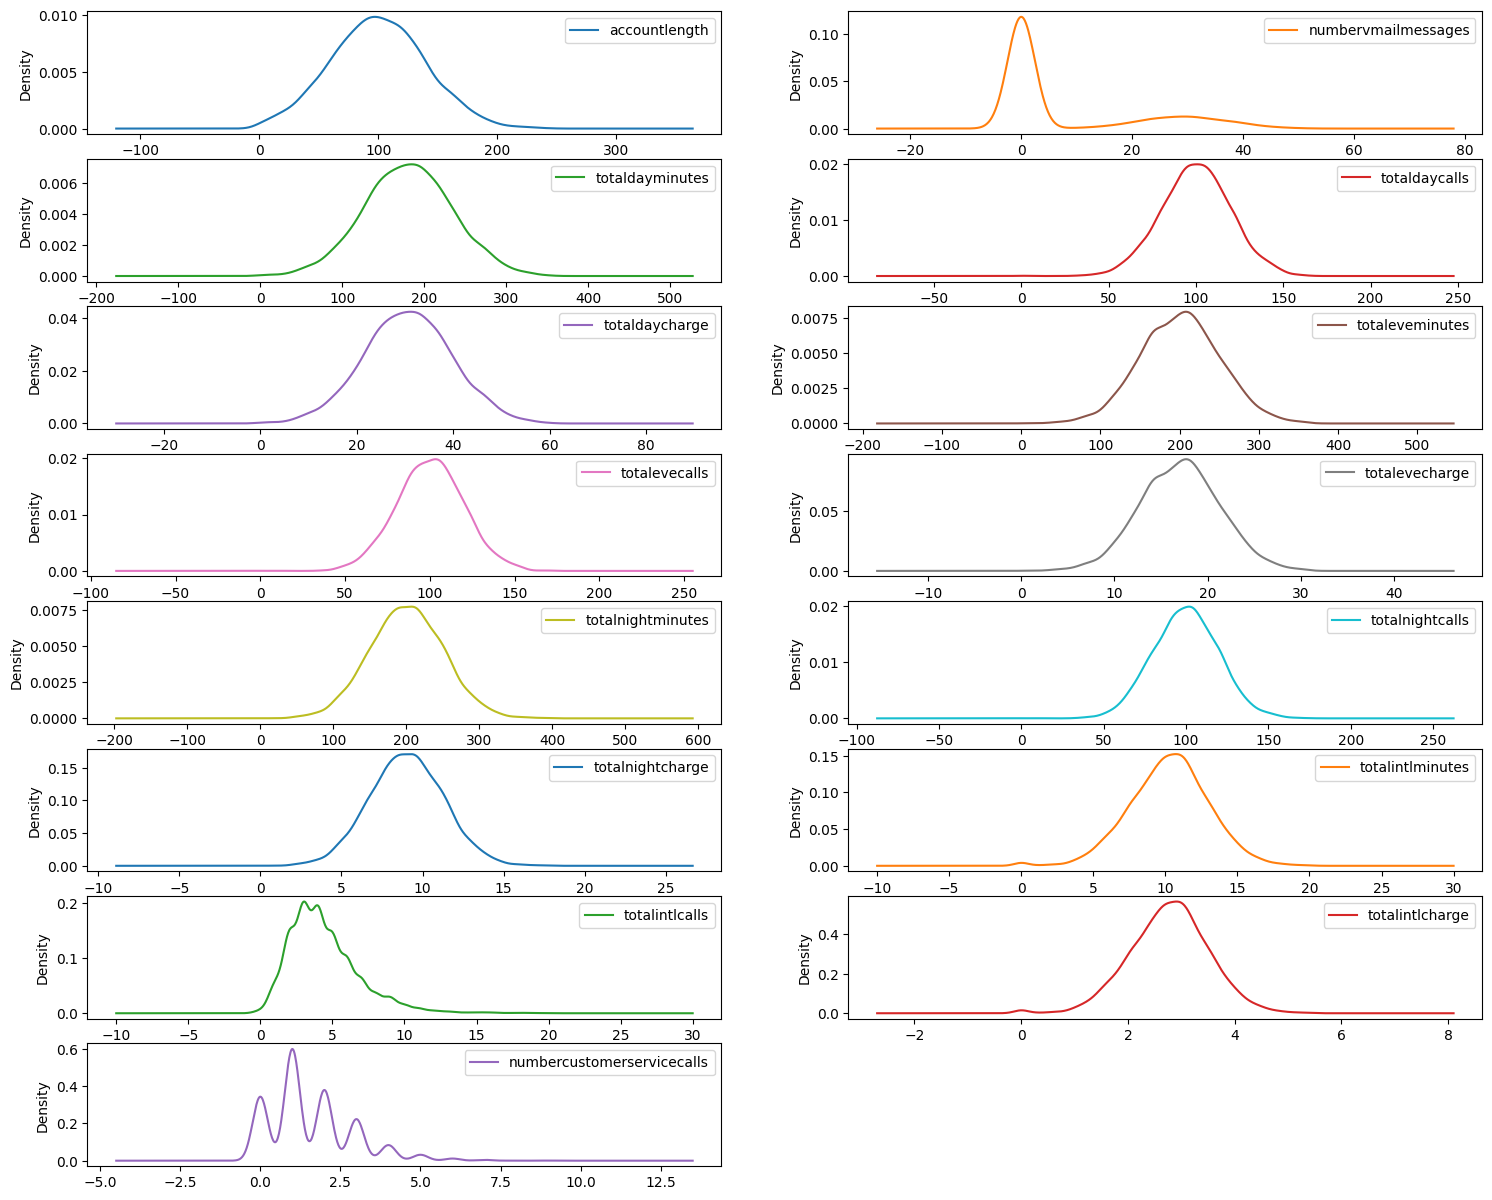

In [ ]:

figsize=(18,15)



# Preliminary analysis
numeric_columns = d.select_dtypes(include=['float64']).columns
# Summaries
data=d[numeric_columns]
print("Summaries:")
print(data.describe())

# Spread measures
print("\nVar for each feature:")
for feature in data.columns:
    print(f"{feature}: {data[feature].var()}")


# Histograms for interval-scaled and ratio-scaled variables
data.hist(figsize=figsize)
plt.show()



# Identify numeric columns


# Create a boxplot for each numeric column
plt.figure(figsize=(12, 8))
sns.boxplot(data=d[numeric_columns], orient='h', palette='Set2')
plt.title('Boxplot of Numeric Columns with IQR')
plt.show()


# Density plots for interval-scaled and ratio-scaled variables
data.plot(kind='density', subplots=True, layout=(8, 2), sharex=False, figsize=figsize)
plt.show()

###2.3. Bivariate Analysis

Correlation

In [ ]:
interval_scaled_variables = ['accountlength', 'totaldayminutes', 'totaleveminutes', 'totalnightminutes', 'totalintlminutes','numbercustomerservicecalls']
binary_variables = ['internationalplan', 'voicemailplan', 'churn']

ordinal_variables = ['totaldaycalls', 'totalevecalls', 'totalnightcalls', 'totalintlcalls']
ratio_scaled_variables = ['numbervmailmessages', 'totaldaycharge', 'totalevecharge', 'totalnightcharge', 'totalintlcharge']
d0=d.copy()
# Encode binary variables
label_encoder = LabelEncoder()
for variable in binary_variables:
    d0[variable] = label_encoder.fit_transform(d0[variable])
d0.corr()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
churn,1.000000,0.018030,0.223803,-0.096899,-0.100033,0.203456,0.015843,0.203629,0.089648,-0.008123,0.089903,0.043556,-0.006869,0.046459,0.062206,-0.045500,0.061505,0.218272
accountlength,0.018030,1.000000,0.004626,-0.019921,-0.016578,-0.002032,0.026608,0.000848,-0.008350,0.010261,-0.006566,0.003416,-0.013918,0.002029,0.000179,0.013805,-0.002017,-0.001163
internationalplan,0.223803,0.004626,1.000000,-0.002055,0.005313,0.021373,0.000998,0.021516,0.031764,-0.018835,0.031758,-0.007511,0.016501,-0.009019,0.023344,0.003233,0.023847,-0.014861
voicemailplan,-0.096899,-0.019921,-0.002055,1.000000,0.880649,-0.000015,0.005414,0.000210,0.031264,-0.002040,0.030519,0.004407,0.011179,0.004599,-0.004851,-0.000193,-0.003303,-0.005254
numbervmailmessages,-0.100033,-0.016578,0.005313,0.880649,1.000000,0.008372,0.001462,0.008061,0.021511,-0.006178,0.021395,0.004602,0.001303,0.005013,0.004232,-0.005106,0.004376,-0.009822
totaldayminutes,0.203456,-0.002032,0.021373,-0.000015,0.008372,1.000000,0.003293,0.992380,-0.012065,0.008590,-0.012963,0.009139,0.004781,0.008854,-0.021166,0.001703,-0.019034,-0.005587
totaldaycalls,0.015843,0.026608,0.000998,0.005414,0.001462,0.003293,1.000000,-0.000558,-0.001513,0.002660,-0.000358,0.005791,-0.006968,0.003363,0.015901,0.011160,0.013841,-0.009722
totaldaycharge,0.203629,0.000848,0.021516,0.000210,0.008061,0.992380,-0.000558,1.000000,-0.007493,0.009208,-0.007804,0.009312,0.003755,0.009024,-0.021769,0.001052,-0.018907,-0.003352
totaleveminutes,0.089648,-0.008350,0.031764,0.031264,0.021511,-0.012065,-0.001513,-0.007493,1.000000,0.004650,1.000000,-0.018643,0.013485,-0.017422,0.000448,0.011040,-0.005342,-0.013153
totalevecalls,-0.008123,0.010261,-0.018835,-0.002040,-0.006178,0.008590,0.002660,0.009208,0.004650,1.000000,0.004467,0.003123,-0.013249,0.003388,-0.006909,0.001281,-0.005569,0.005610


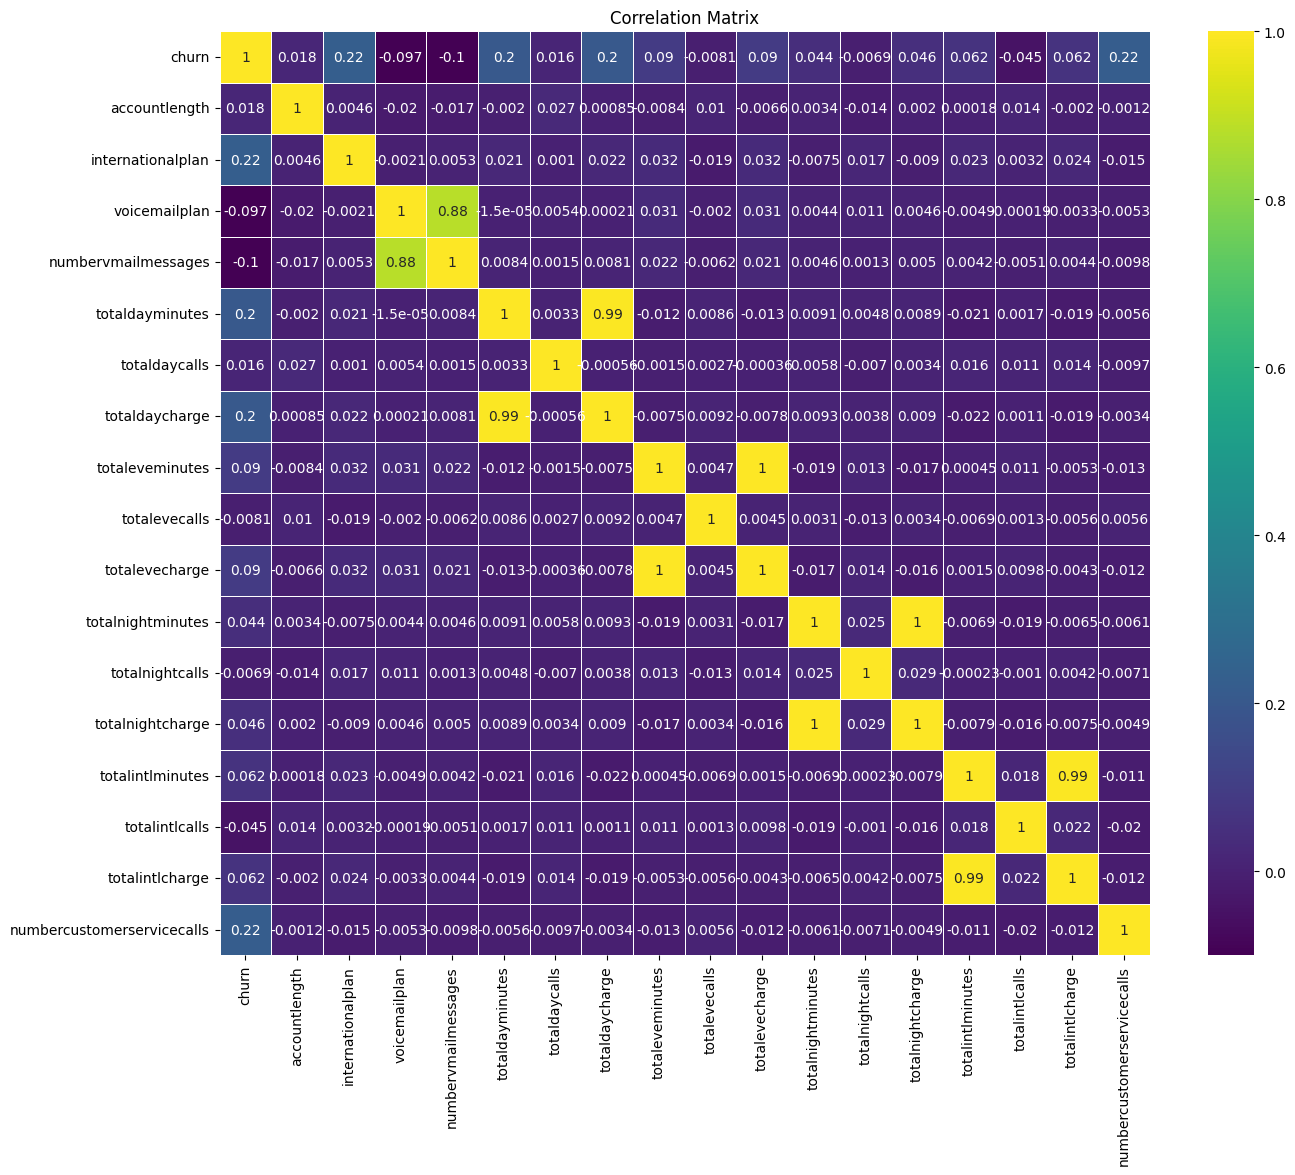

In [ ]:
correlation_matrix = d0.corr()
plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
high_correlation_features = ['internationalplan', 'totaldaycharge', 'totaldayminutes', 'numbercustomerservicecalls']

Regression

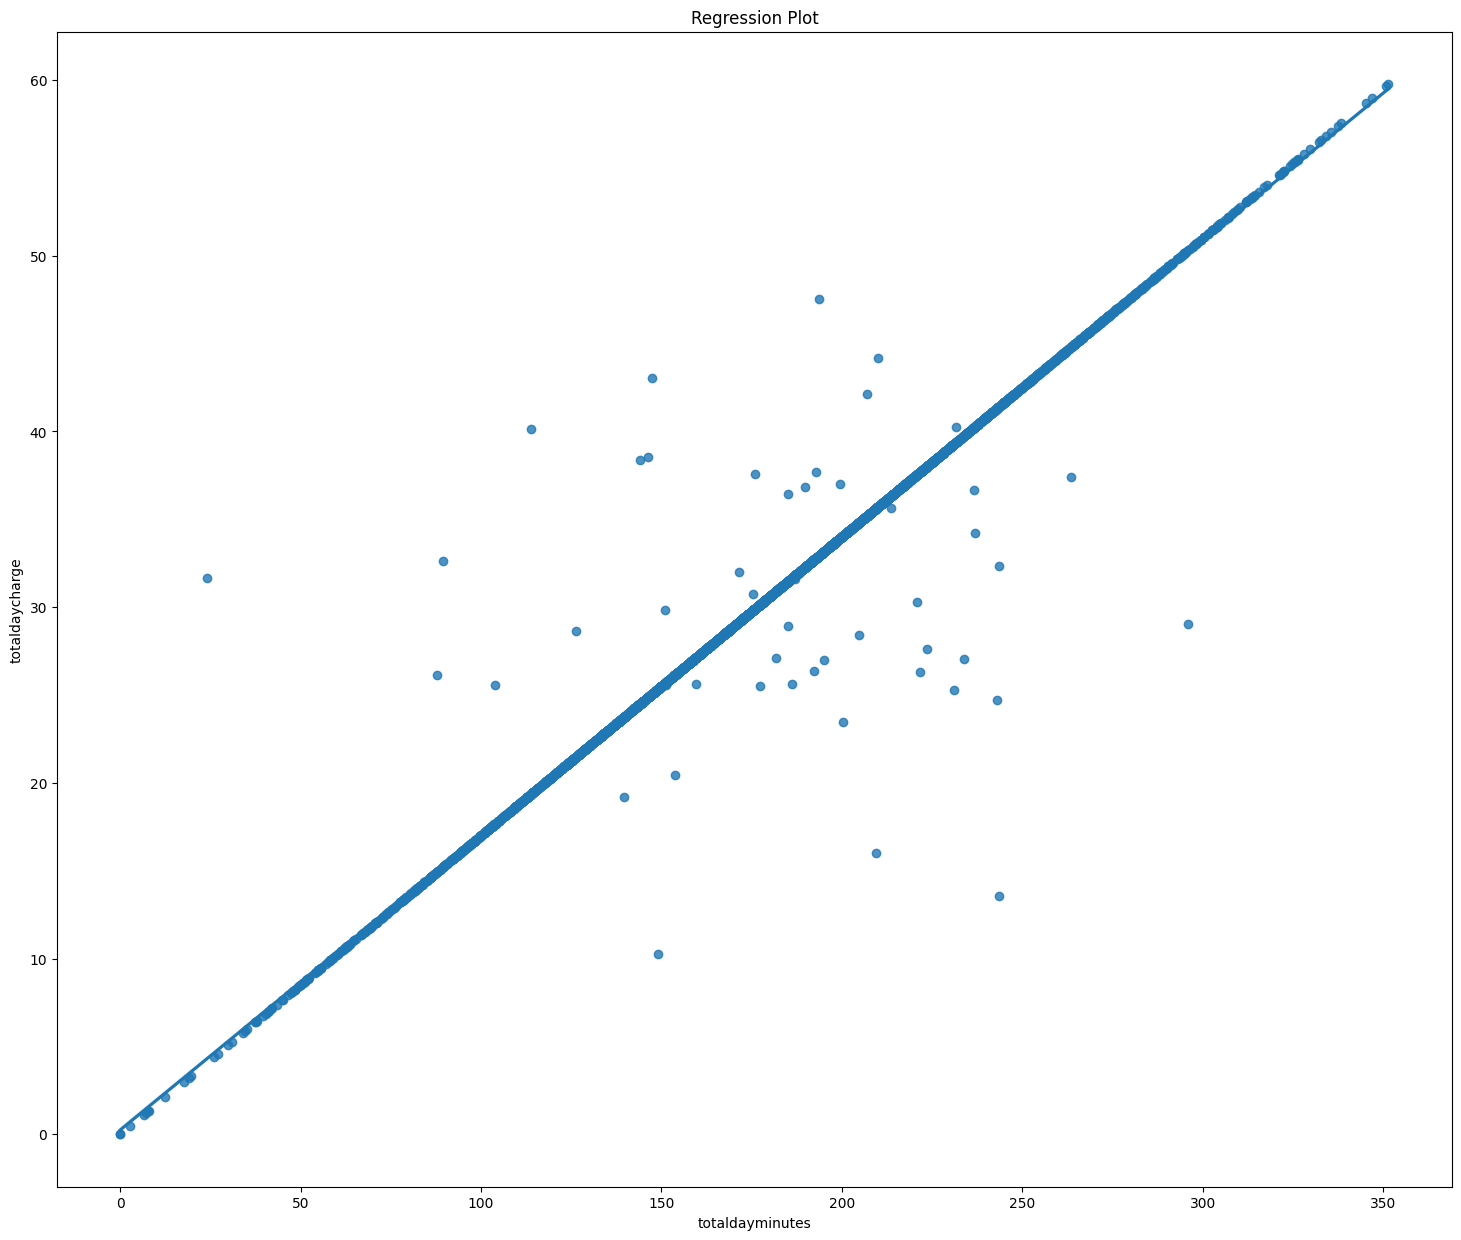

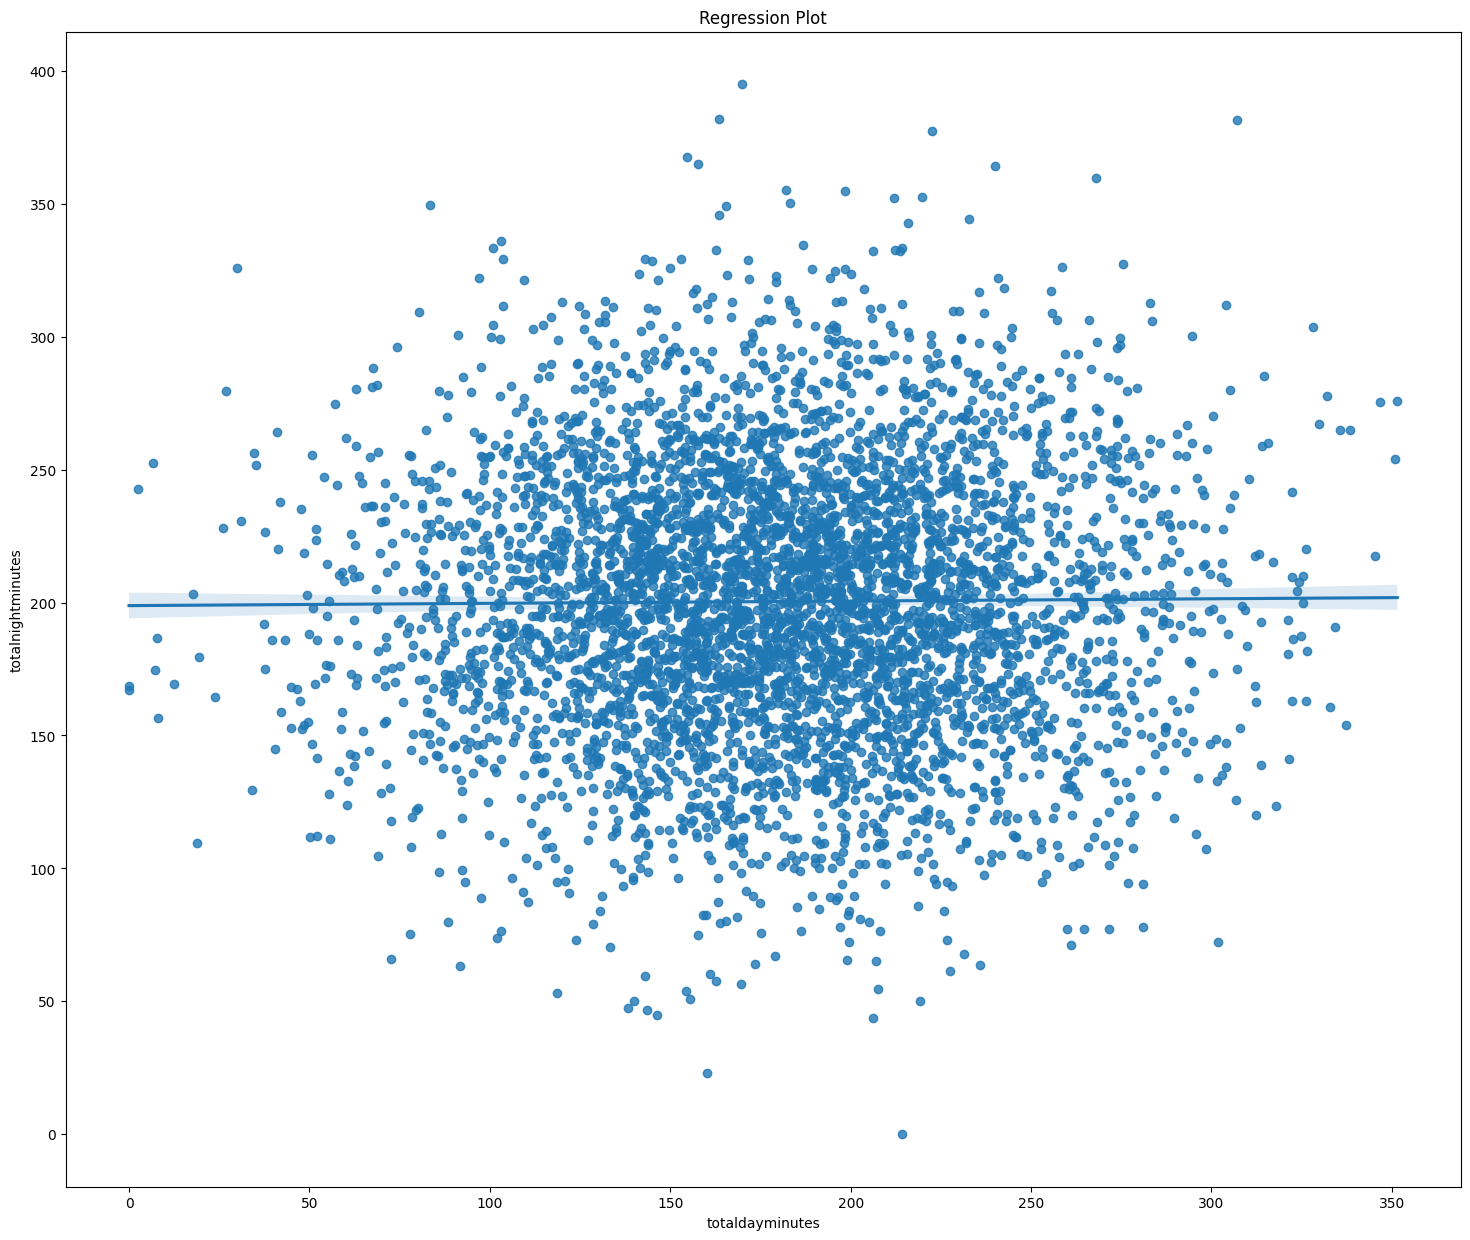

In [ ]:
figsize=(18,15)
plt.figure(figsize=figsize)
sns.regplot(x='totaldayminutes', y='totaldaycharge', data=d0)
plt.title('Regression Plot')
plt.show()

plt.figure(figsize=figsize)
sns.regplot(x='totaldayminutes', y='totalnightminutes', data=d0)
plt.title('Regression Plot')
plt.show()

###2.4. Other analysis, Churn Histogram and Feature Importance

In [ ]:
#outliers Count


def count_outliers_numeric(dd):
    """
    Count outliers in each numeric column of a DataFrame using the IQR method.
    :param df: Pandas DataFrame
    :return: Dictionary with column names as keys and the count of outliers as values
    """
    outliers_count = {}

    for column in d.select_dtypes(include=np.number).columns:
        # Calculate the IQR
        Q1 = dd[column].quantile(0.25)
        Q3 = dd[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers_count[column] = len(dd[(dd[column] < lower_bound) | (dd[column] > upper_bound)])

    return outliers_count


outliers_count_numeric = count_outliers_numeric(d0)

# Print the count of outliers for each numeric column

for column, count in outliers_count_numeric.items():
    print(f"Numeric column '{column}' has {count} outliers ({count*1/50}% of column entries)")




Numeric column 'accountlength' has 24 outliers (0.48% of column entries)
Numeric column 'numbervmailmessages' has 60 outliers (1.2% of column entries)
Numeric column 'totaldayminutes' has 35 outliers (0.7% of column entries)
Numeric column 'totaldaycalls' has 35 outliers (0.7% of column entries)
Numeric column 'totaldaycharge' has 36 outliers (0.72% of column entries)
Numeric column 'totaleveminutes' has 42 outliers (0.84% of column entries)
Numeric column 'totalevecalls' has 27 outliers (0.54% of column entries)
Numeric column 'totalevecharge' has 42 outliers (0.84% of column entries)
Numeric column 'totalnightminutes' has 39 outliers (0.78% of column entries)
Numeric column 'totalnightcalls' has 43 outliers (0.86% of column entries)
Numeric column 'totalnightcharge' has 39 outliers (0.78% of column entries)
Numeric column 'totalintlminutes' has 71 outliers (1.42% of column entries)
Numeric column 'totalintlcalls' has 114 outliers (2.28% of column entries)
Numeric column 'totalintlcha

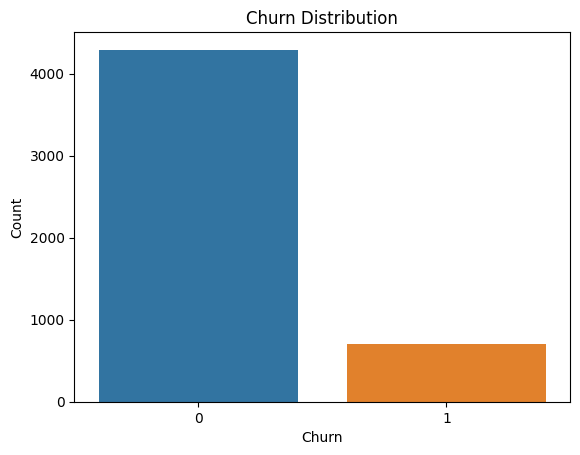

In [ ]:

sns.countplot(x='churn', data=d0)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


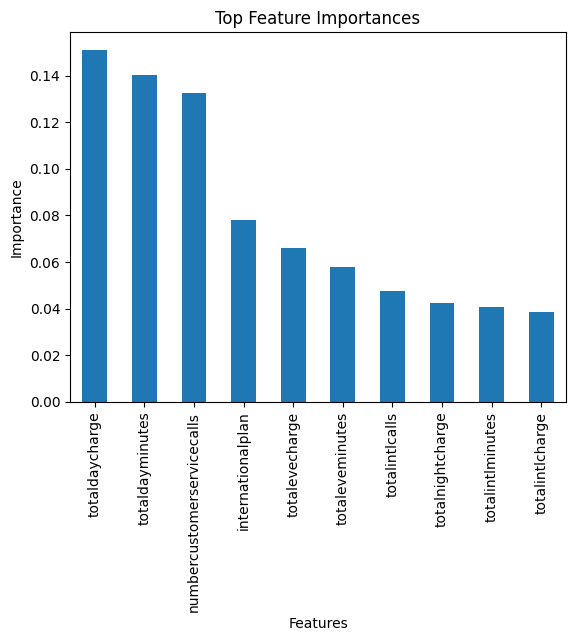

It agrees with what we analysed from the Correlation matrix


In [ ]:
# Preliminar feature importance previous data processing so we can repeat latter comparing how the processing affected our data.



# Separate features and target variable
X = d0.drop('churn', axis=1)
y = d0['churn']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Impute missing values using mean (you can choose another strategy)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_imputed, y_train)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values(ascending=False)

# Plot the top N feature importances
top_n = 10  # You can adjust this based on your preference
feature_importances[:top_n].plot(kind='bar')
plt.title('Top Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

print('It agrees with what we analysed from the Correlation matrix')

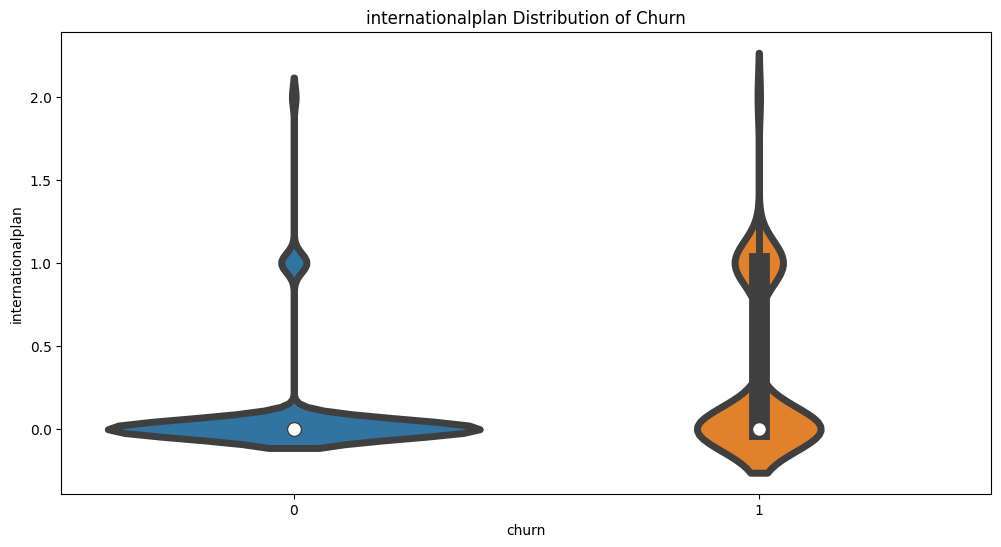

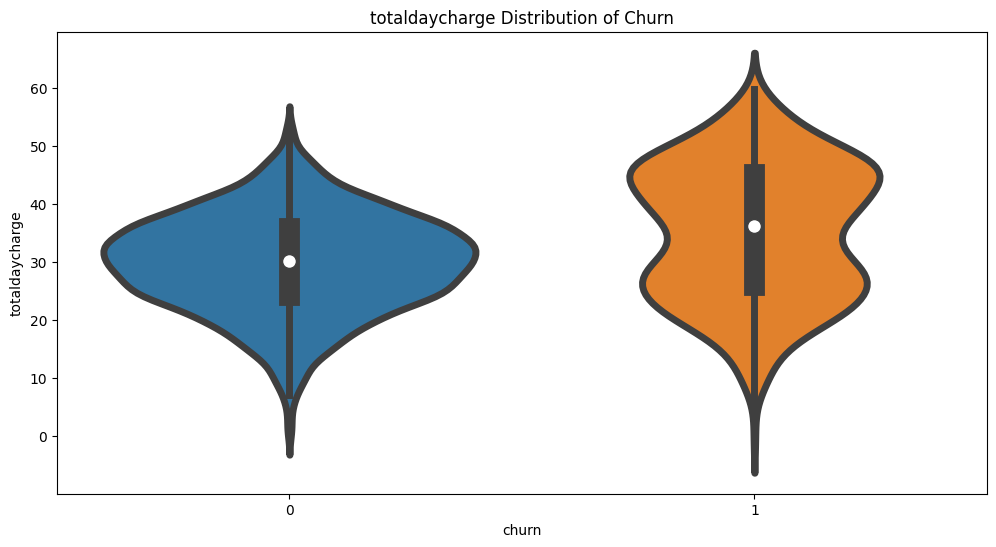

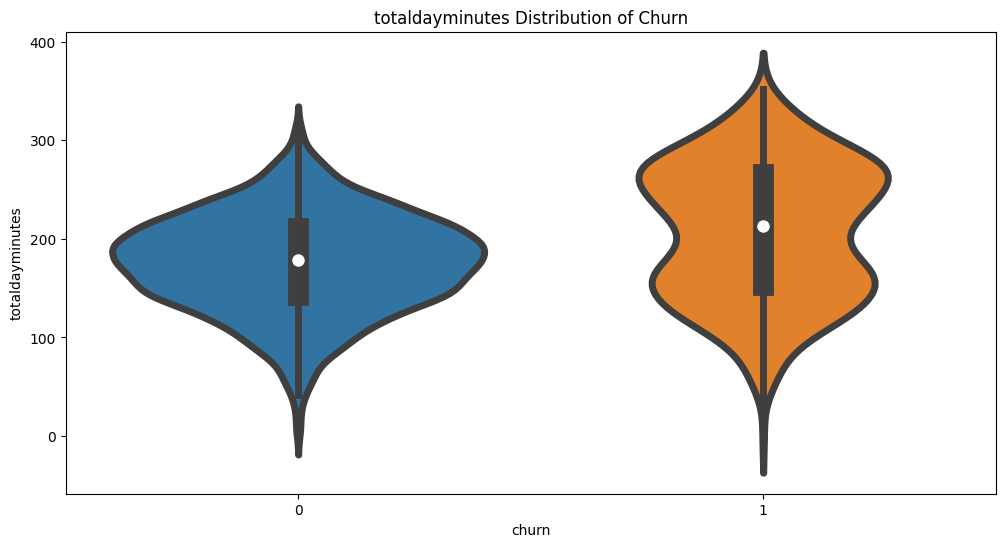

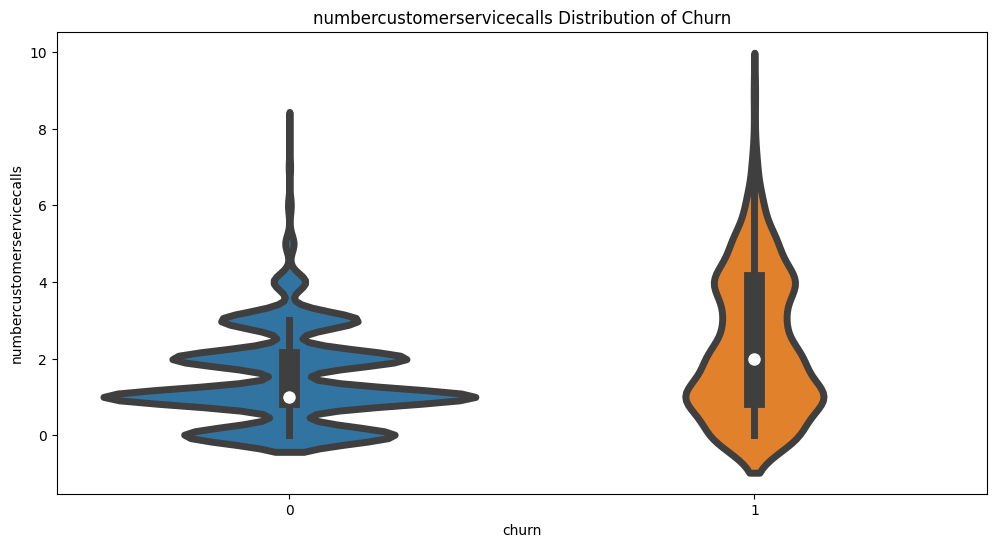

In [ ]:
# Plot violin plots for each feature in 'high_correlation_features'
for feature in high_correlation_features:
    # Violin Plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x=d0['churn'], y=d0[feature], linewidth=5)
    plt.title(f"{feature} Distribution of Churn")
    plt.show()




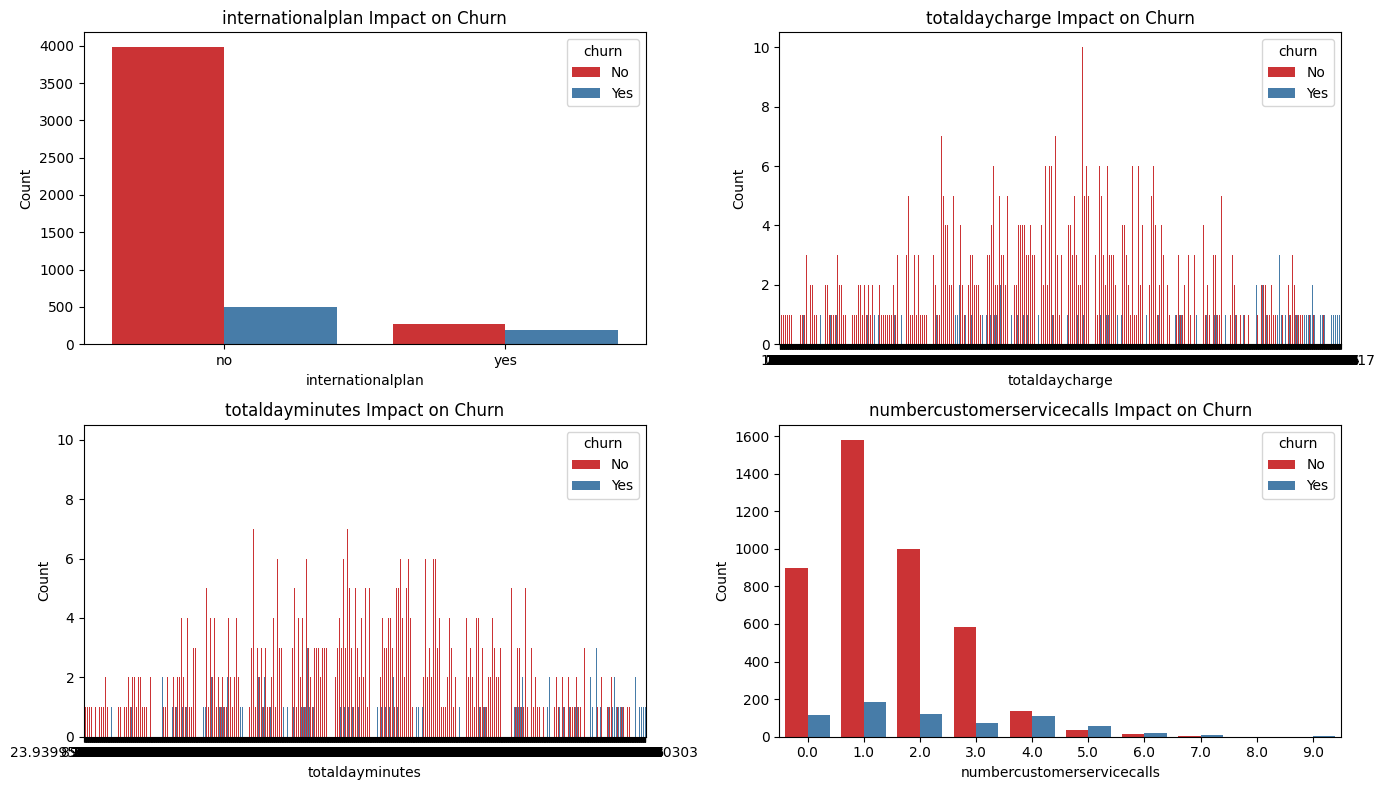

In [ ]:
# Plot grouped bar plots for each feature in 'high_correlation_features'
plt.figure(figsize=(14, 8))
for i, feature in enumerate(high_correlation_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, hue='churn', data=d, palette='Set1')
    plt.title(f"{feature} Impact on Churn")
    plt.xlabel(feature)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


###2.5. Insights

In [ ]:
print(f"By analyzing the correlation matrix:")
print(f"- Features with the highest correlation with Churn: {', '.join(high_correlation_features)}")




By analyzing the correlation matrix:
- Features with the highest correlation with Churn: internationalplan, totaldaycharge, totaldayminutes, numbercustomerservicecalls


## **3. Data Preparation**

**d** - original dataset
<br>
**d0** - label encoded dataset - used for correlation
<br>
**d1** - remove NaNs and input outliers by median
<br>
**d2** - input NaNs and outliers by median
<br>
**d3** - Remove NaNs and transformation using min-max normalization and log
<br>
**d4** - input NaNs by Median and smoth data

In [ ]:
# Data selection
print("Summary of d:")
print(d0.describe())

Summary of d:
             churn  accountlength  internationalplan  voicemailplan  \
count  5000.000000    4951.000000        5000.000000    5000.000000   
mean      0.141400     100.238295           0.113800       0.282400   
std       0.348469      39.718817           0.347669       0.471905   
min       0.000000       1.000000           0.000000       0.000000   
25%       0.000000      73.000000           0.000000       0.000000   
50%       0.000000     100.000000           0.000000       0.000000   
75%       0.000000     127.000000           0.000000       1.000000   
max       1.000000     243.000000           2.000000       2.000000   

       numbervmailmessages  totaldayminutes  totaldaycalls  totaldaycharge  \
count          4950.000000      4950.000000    4950.000000     4950.000000   
mean              7.763636       180.306625     100.038788       30.629386   
std              13.552928        53.926625      19.844529        9.148881   
min               0.000000        

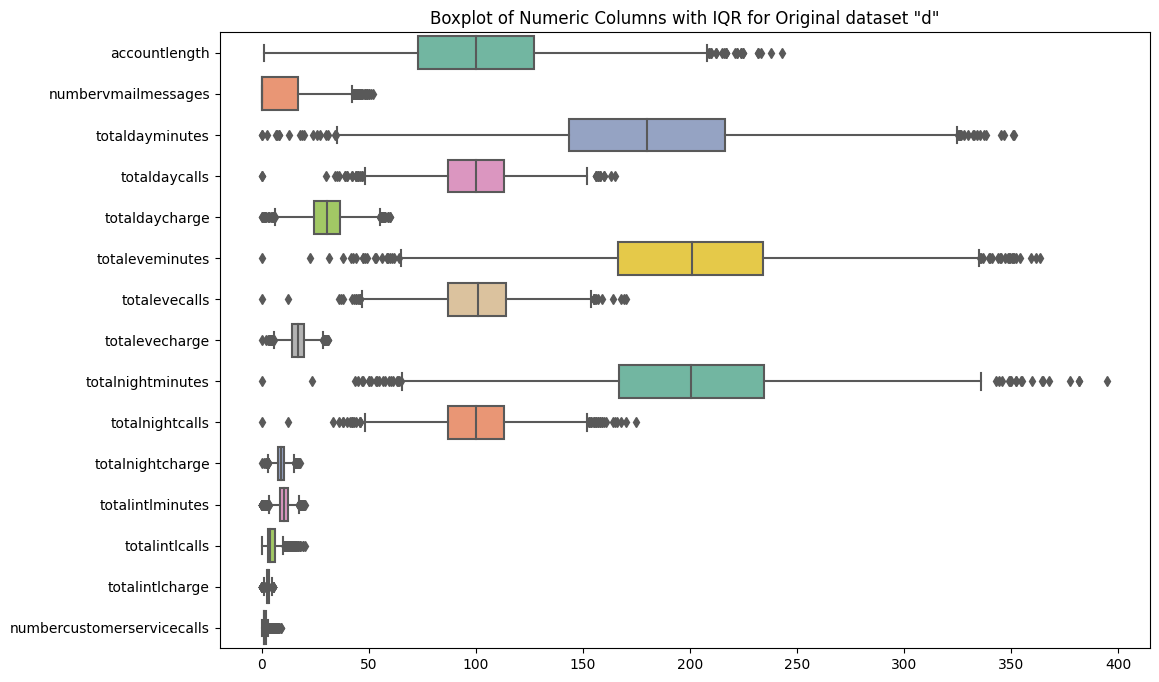

In [ ]:
# Identify numeric columns
numeric_columns = d.select_dtypes(include=['float64']).columns

# Create a boxplot for each numeric column
plt.figure(figsize=(12, 8))
sns.boxplot(data=d[numeric_columns], orient='h', palette='Set2')
plt.title('Boxplot of Numeric Columns with IQR for Original dataset "d"')
plt.show()


###3.1. Removing NaNs and impute Outliers with median

In [ ]:


# --- d1: Remove NaNs and substitute outliers by median using IQR ---
d1 = d.dropna().copy()  # Remove NaNs and create a copy

# Identify numeric columns
numeric_columns = d1.select_dtypes(include=['float64']).columns

# Identify outliers using IQR and replace them with median for numeric columns
for column in numeric_columns:
    Q1 = d1[column].quantile(0.25)
    Q3 = d1[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with median using .loc
    d1.loc[(d1[column] < lower_bound) | (d1[column] > upper_bound), column] = d1[column].median()

# Now, d1 contains NaNs removed and outliers substituted by median for numeric columns

print("Summary of d1:")
print(d1.describe())


Summary of d1:
       accountlength  numbervmailmessages  totaldayminutes  totaldaycalls  \
count    4207.000000          4207.000000      4207.000000    4207.000000   
mean       99.777916             7.216782       180.366806     100.278583   
std        38.901931            12.861846        52.205676      19.198239   
min         1.000000             0.000000        35.100000      48.000000   
25%        73.000000             0.000000       144.000000      88.000000   
50%       100.000000             0.000000       180.200000     100.000000   
75%       126.000000            12.000000       215.750000     113.000000   
max       208.000000            42.000000       324.700000     152.000000   

       totaldaycharge  totaleveminutes  totalevecalls  totalevecharge  \
count     4207.000000      4207.000000    4207.000000     4207.000000   
mean        30.648676       200.393202     100.277633       17.033613   
std          8.877569        48.985309      19.350569        4.163760   

In [ ]:
outliers_count_numeric = count_outliers_numeric(d1)

# Print the count of outliers for each numeric column

for column, count in outliers_count_numeric.items():
    print(f"Numeric column '{column}' has {count} outliers ({count*1/50}% of column entries)")



Numeric column 'accountlength' has 1 outliers (0.02% of column entries)
Numeric column 'numbervmailmessages' has 435 outliers (8.7% of column entries)
Numeric column 'totaldayminutes' has 2 outliers (0.04% of column entries)
Numeric column 'totaldaycalls' has 15 outliers (0.3% of column entries)
Numeric column 'totaldaycharge' has 2 outliers (0.04% of column entries)
Numeric column 'totaleveminutes' has 8 outliers (0.16% of column entries)
Numeric column 'totalevecalls' has 6 outliers (0.12% of column entries)
Numeric column 'totalevecharge' has 8 outliers (0.16% of column entries)
Numeric column 'totalnightminutes' has 3 outliers (0.06% of column entries)
Numeric column 'totalnightcalls' has 6 outliers (0.12% of column entries)
Numeric column 'totalnightcharge' has 3 outliers (0.06% of column entries)
Numeric column 'totalintlminutes' has 2 outliers (0.04% of column entries)
Numeric column 'totalintlcalls' has 177 outliers (3.54% of column entries)
Numeric column 'totalintlcharge' has

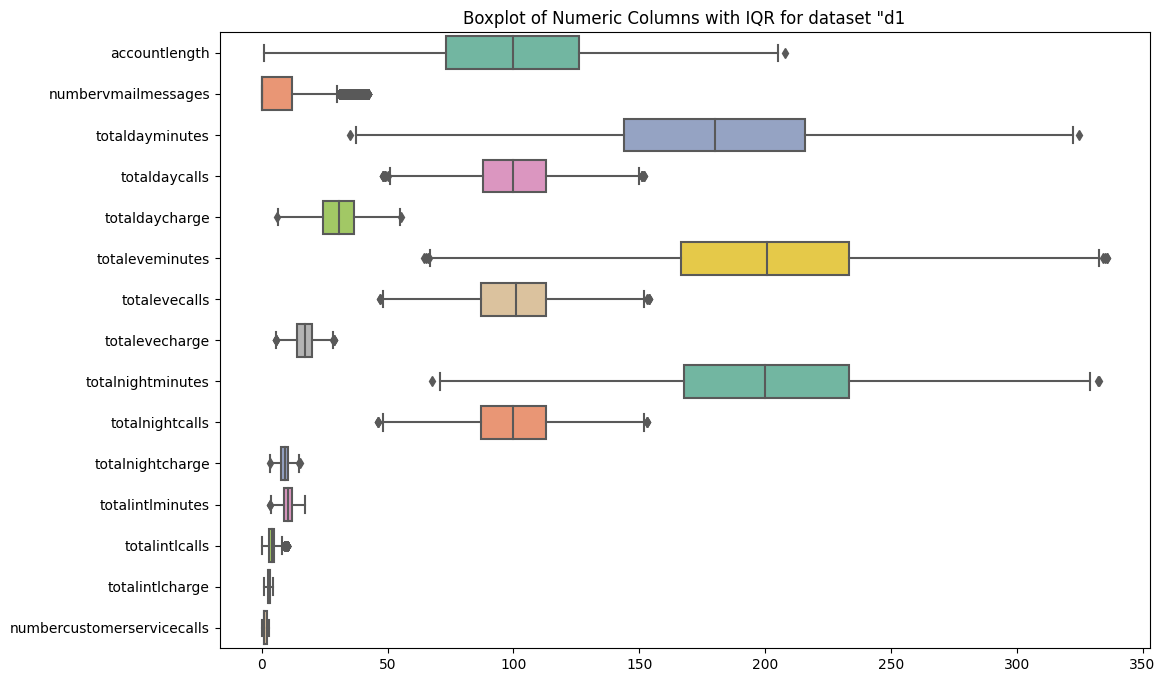

In [ ]:



# Identify numeric columns
numeric_columns = d1.select_dtypes(include=['float64']).columns

# Create a boxplot for each numeric column
plt.figure(figsize=(12, 8))
sns.boxplot(data=d1[numeric_columns], orient='h', palette='Set2')
plt.title('Boxplot of Numeric Columns with IQR for dataset "d1')
plt.show()


###3.2. Imputation

using Median for NaNs and outliers

In [ ]:
# --- d2: Median substitution for NaNs and outliers using IQR ---

d2 = d.copy()

# Fill NaNs with median
d2 = d2.fillna(d2.median())

# Identify outliers using IQR
Q1 = d2.quantile(0.25)
Q3 = d2.quantile(0.75)
IQR = Q3 - Q1

# Create a mask for outliers
outlier_mask = ((d2 < (Q1 - 1.5 * IQR)) | (d2 > (Q3 + 1.5 * IQR)))

# Replace outliers with NaN
d2[outlier_mask] = np.nan

# Fill NaNs with median again
d2 = d2.fillna(d2.median())

# Print summaries or check the resulting dataset
print("Summary of d2:")
print(d2.describe())


Summary of d2:
       accountlength  numbervmailmessages  totaldayminutes  totaldaycalls  \
count    5000.000000          5000.000000      5000.000000    5000.000000   
mean       99.657160             6.817600       180.307890     100.182600   
std        38.624106            12.522208        51.811191      19.056996   
min         1.000000             0.000000        37.400000      48.000000   
25%        73.000000             0.000000       144.600000      87.750000   
50%       100.000000             0.000000       180.100000     100.000000   
75%       126.000000             0.000000       215.500000     113.000000   
max       208.000000            40.000000       322.500000     152.000000   

       totaldaycharge  totaleveminutes  totalevecalls  totalevecharge  \
count     5000.000000      5000.000000    5000.000000     5000.000000   
mean        30.629099       200.765920     100.267800       17.053954   
std          8.803454        48.147578      19.101399        4.097673   

<ipython-input-29-ad5e9f804175>:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  d2 = d2.fillna(d2.median())
<ipython-input-29-ad5e9f804175>:9: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = d2.quantile(0.25)
<ipython-input-29-ad5e9f804175>:10: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = d2.quantile(0.75)
<ipython-input-29-ad5e9f804175>:14: FutureWarning: Automatic reindexing on DataFrame vs Series

In [ ]:
outliers_count_numeric = count_outliers_numeric(d2)

# Print the count of outliers for each numeric column

for column, count in outliers_count_numeric.items():
    print(f"Numeric column '{column}' has {count} outliers ({count*1/50}% of column entries)")

Numeric column 'accountlength' has 1 outliers (0.02% of column entries)
Numeric column 'numbervmailmessages' has 1211 outliers (24.22% of column entries)
Numeric column 'totaldayminutes' has 7 outliers (0.14% of column entries)
Numeric column 'totaldaycalls' has 17 outliers (0.34% of column entries)
Numeric column 'totaldaycharge' has 7 outliers (0.14% of column entries)
Numeric column 'totaleveminutes' has 6 outliers (0.12% of column entries)
Numeric column 'totalevecalls' has 24 outliers (0.48% of column entries)
Numeric column 'totalevecharge' has 6 outliers (0.12% of column entries)
Numeric column 'totalnightminutes' has 7 outliers (0.14% of column entries)
Numeric column 'totalnightcalls' has 0 outliers (0.0% of column entries)
Numeric column 'totalnightcharge' has 8 outliers (0.16% of column entries)
Numeric column 'totalintlminutes' has 7 outliers (0.14% of column entries)
Numeric column 'totalintlcalls' has 220 outliers (4.4% of column entries)
Numeric column 'totalintlcharge' 

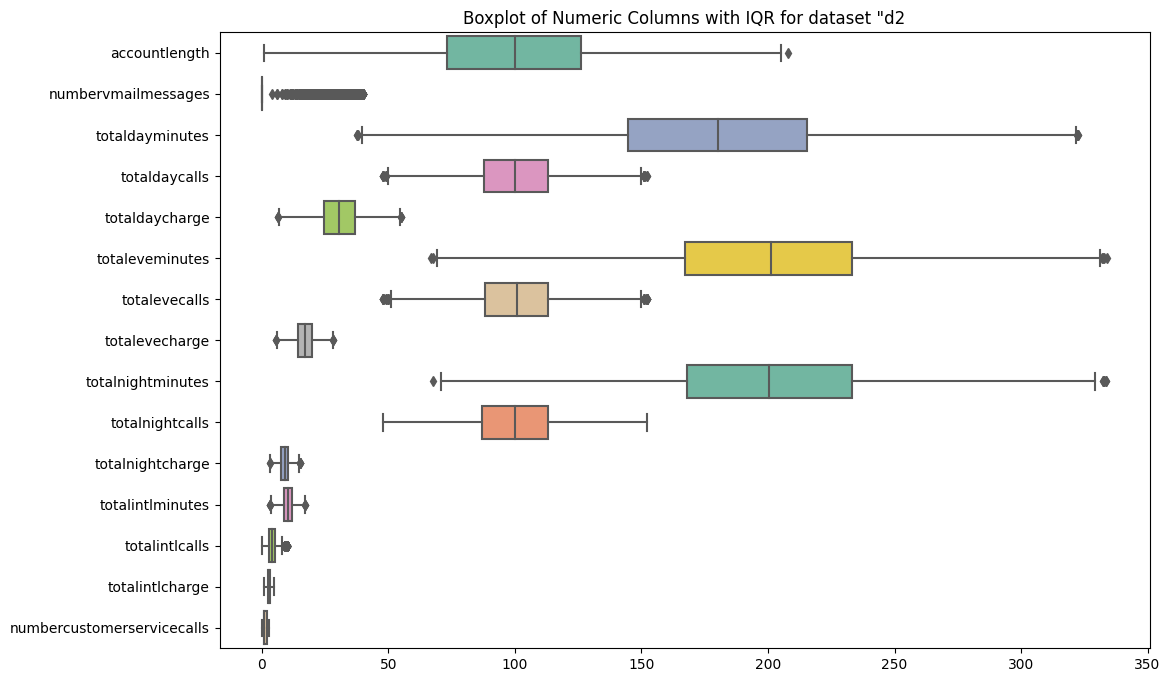

In [ ]:

# Identify numeric columns
numeric_columns = d2.select_dtypes(include=['float64']).columns

# Create a boxplot for each numeric column
plt.figure(figsize=(12, 8))
sns.boxplot(data=d2[numeric_columns], orient='h', palette='Set2')
plt.title('Boxplot of Numeric Columns with IQR for dataset "d2')
plt.show()

###3.3. Transformation
Input median for the NaNs
Transform with min-max and log


In [ ]:


# Create a copy of the original DataFrame
d3 = d.copy()

# Fill NaNs with median
d3 = d3.fillna(d3.median())

# Log transformation for 'numbervmailmessages'
d3['numbervmailmessages'] = np.log1p(d3['numbervmailmessages'])

# Min-Max scaling for usage metrics
usage_columns = ['totaldayminutes', 'totaldaycalls', 'totaldaycharge', 'totaleveminutes', 'totalevecalls', 'totalevecharge',
                  'totalnightminutes', 'totalnightcalls', 'totalnightcharge', 'totalintlminutes', 'totalintlcalls', 'totalintlcharge', 'accountlength']

scaler = MinMaxScaler()
d3[usage_columns] = scaler.fit_transform(d3[usage_columns])

print("Summary of d3:")
print(d3.describe())





Summary of d3:
       accountlength  numbervmailmessages  totaldayminutes  totaldaycalls  \
count    5000.000000          5000.000000      5000.000000    5000.000000   
mean        0.410066             0.884200         0.512957       0.606293   
std         0.163321             1.491360         0.152649       0.119667   
min         0.000000             0.000000         0.000000       0.000000   
25%         0.297521             0.000000         0.409886       0.527273   
50%         0.409091             0.000000         0.512376       0.606061   
75%         0.520661             2.833213         0.614225       0.684848   
max         1.000000             3.970292         1.000000       1.000000   

       totaldaycharge  totaleveminutes  totalevecalls  totalevecharge  \
count     5000.000000      5000.000000    5000.000000     5000.000000   
mean         0.512535         0.551782       0.589714        0.551560   
std          0.152326         0.138117       0.116106        0.138432   

<ipython-input-81-2978746c432d>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  d3 = d3.fillna(d3.median())


In [ ]:
outliers_count_numeric = count_outliers_numeric(d3)

# Print the count of outliers for each numeric column

for column, count in outliers_count_numeric.items():
    print(f"Numeric column '{column}' has {count} outliers ({count*1/50}% of column entries)")

Numeric column 'accountlength' has 24 outliers (0.48% of column entries)
Numeric column 'numbervmailmessages' has 0 outliers (0.0% of column entries)
Numeric column 'totaldayminutes' has 39 outliers (0.78% of column entries)
Numeric column 'totaldaycalls' has 37 outliers (0.74% of column entries)
Numeric column 'totaldaycharge' has 37 outliers (0.74% of column entries)
Numeric column 'totaleveminutes' has 46 outliers (0.92% of column entries)
Numeric column 'totalevecalls' has 34 outliers (0.68% of column entries)
Numeric column 'totalevecharge' has 47 outliers (0.94% of column entries)
Numeric column 'totalnightminutes' has 44 outliers (0.88% of column entries)
Numeric column 'totalnightcalls' has 50 outliers (1.0% of column entries)
Numeric column 'totalnightcharge' has 43 outliers (0.86% of column entries)
Numeric column 'totalintlminutes' has 71 outliers (1.42% of column entries)
Numeric column 'totalintlcalls' has 114 outliers (2.28% of column entries)
Numeric column 'totalintlcha

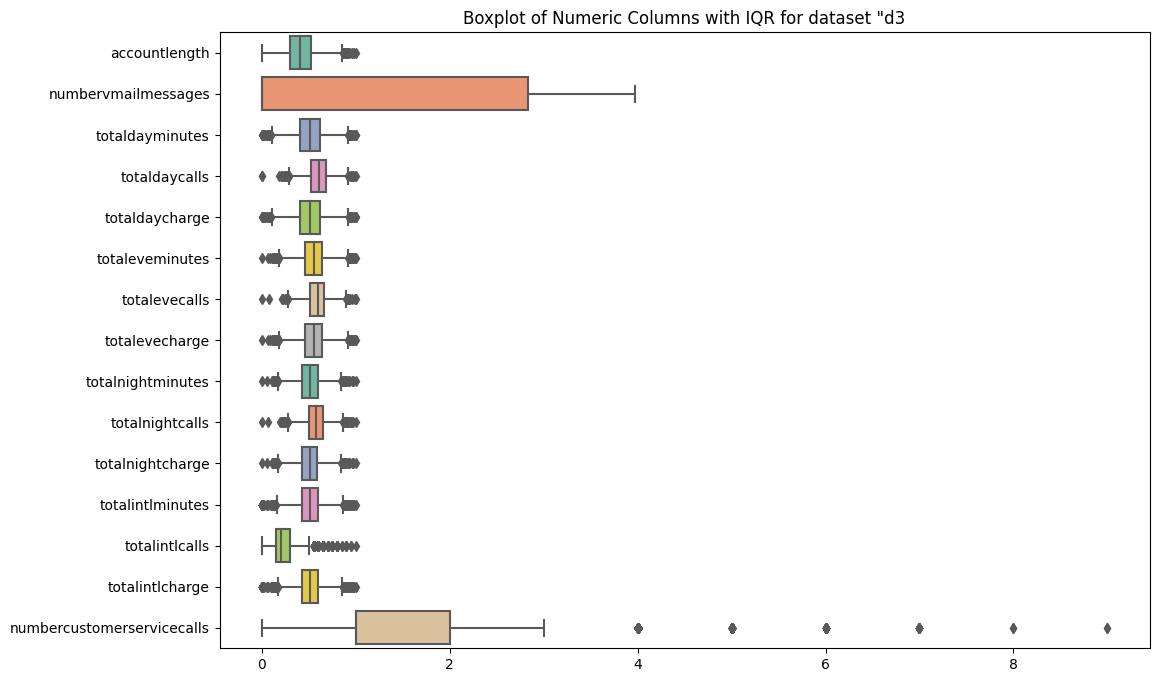

In [ ]:

# Identify numeric columns
numeric_columns = d3.select_dtypes(include=['float64']).columns

# Create a boxplot for each numeric column
plt.figure(figsize=(12, 8))
sns.boxplot(data=d3[numeric_columns], orient='h', palette='Set2')
plt.title('Boxplot of Numeric Columns with IQR for dataset "d3')
plt.show()

###3.4. Imputation + smothing

In [ ]:



d4 = d.copy()

# Fill NaNs with median
d4 = d4.fillna(d4.median())

# Identify numeric columns
numeric_columns = d4.select_dtypes(include=['float64']).columns

# Smoothing the numeric columns using Savitzky-Golay filter
def smooth_data(data, window_length=5, polyorder=2):
    smoothed_data = data.copy()
    for column in numeric_columns:
        smoothed_data[column] = savgol_filter(data[column], window_length, polyorder)
    return smoothed_data

# Assuming 'window_length' and 'polyorder' are appropriate values
d4 = smooth_data(d4)
print("Summary of d4:")
print(d4.describe())
# Now, 'd4' contains the data with NaNs imputed by median and smoothed for numeric columns


Summary of d4:
       accountlength  numbervmailmessages  totaldayminutes  totaldaycalls  \
count    5000.000000          5000.000000      5000.000000    5000.000000   
mean      100.237434             7.685623       180.307513     100.037417   
std        27.148362             9.384777        37.273367      13.704388   
min         7.657143            -7.285714        41.934286      29.057143   
25%        82.050000             0.000000       155.723113      91.228571   
50%       100.114286             7.200000       180.425714     100.000000   
75%       118.603925            13.371429       205.159286     109.342857   
max       199.028571            51.428571       310.234286     147.028571   

       totaldaycharge  totaleveminutes  totalevecalls  totalevecharge  \
count     5000.000000      5000.000000    5000.000000     5000.000000   
mean        30.629595       200.682957     100.250109       17.048706   
std          6.322692        35.206570      13.755755        2.993272   

<ipython-input-35-828ade9adcce>:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  d4 = d4.fillna(d4.median())


In [ ]:
outliers_count_numeric = count_outliers_numeric(d4)

# Print the count of outliers for each numeric column

for column, count in outliers_count_numeric.items():
    print(f"Numeric column '{column}' has {count} outliers ({count*1/50}% of column entries)")

Numeric column 'accountlength' has 32 outliers (0.64% of column entries)
Numeric column 'numbervmailmessages' has 47 outliers (0.94% of column entries)
Numeric column 'totaldayminutes' has 42 outliers (0.84% of column entries)
Numeric column 'totaldaycalls' has 47 outliers (0.94% of column entries)
Numeric column 'totaldaycharge' has 42 outliers (0.84% of column entries)
Numeric column 'totaleveminutes' has 42 outliers (0.84% of column entries)
Numeric column 'totalevecalls' has 43 outliers (0.86% of column entries)
Numeric column 'totalevecharge' has 44 outliers (0.88% of column entries)
Numeric column 'totalnightminutes' has 35 outliers (0.7% of column entries)
Numeric column 'totalnightcalls' has 54 outliers (1.08% of column entries)
Numeric column 'totalnightcharge' has 39 outliers (0.78% of column entries)
Numeric column 'totalintlminutes' has 55 outliers (1.1% of column entries)
Numeric column 'totalintlcalls' has 87 outliers (1.74% of column entries)
Numeric column 'totalintlcha

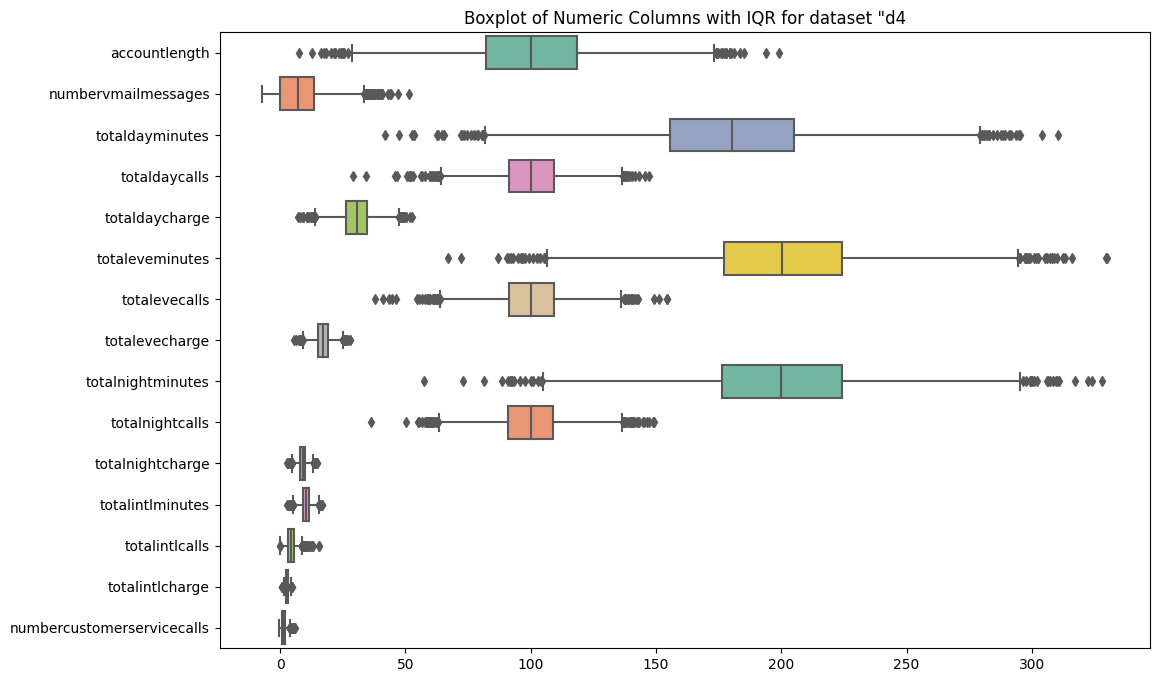

In [ ]:

# Identify numeric columns
numeric_columns = d4.select_dtypes(include=['float64']).columns

# Create a boxplot for each numeric column
plt.figure(figsize=(12, 8))
sns.boxplot(data=d4[numeric_columns], orient='h', palette='Set2')
plt.title('Boxplot of Numeric Columns with IQR for dataset "d4')
plt.show()

###3.5. Train test split

**number of splits:** 5
<br>
**Train:** 80%
<br>
**Test:** 20%

In [ ]:




# Encode the target variable 'churn'
label_encoder = LabelEncoder()
for variable in binary_variables:
    d1[variable] = label_encoder.fit_transform(d1[variable])
    d2[variable] = label_encoder.fit_transform(d2[variable])
    d3[variable] = label_encoder.fit_transform(d3[variable])
    d4[variable] = label_encoder.fit_transform(d4[variable])

# Function to split the data
def train_test_split_data(X, y):
    # Split the data using StratifiedShuffleSplit
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

    train_test_splits = []

    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        train_test_splits.append({
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test
        })

    return train_test_splits

# Apply to d1
X1 = d1.drop(columns=['churn'])
y1 = d1['churn']
train_test_splits_d1 = train_test_split_data(X1, y1)

# Apply to d2
X2 = d2.drop(columns=['churn'])
y2 = d2['churn']
train_test_splits_d2 = train_test_split_data(X2, y2)

# Apply to d3
X3 = d3.drop(columns=['churn'])
y3 = d3['churn']
train_test_splits_d3 = train_test_split_data(X3, y3)

# Apply to d4
X4 = d4.drop(columns=['churn'])
y4 = d4['churn']
train_test_splits_d4 = train_test_split_data(X4, y4)



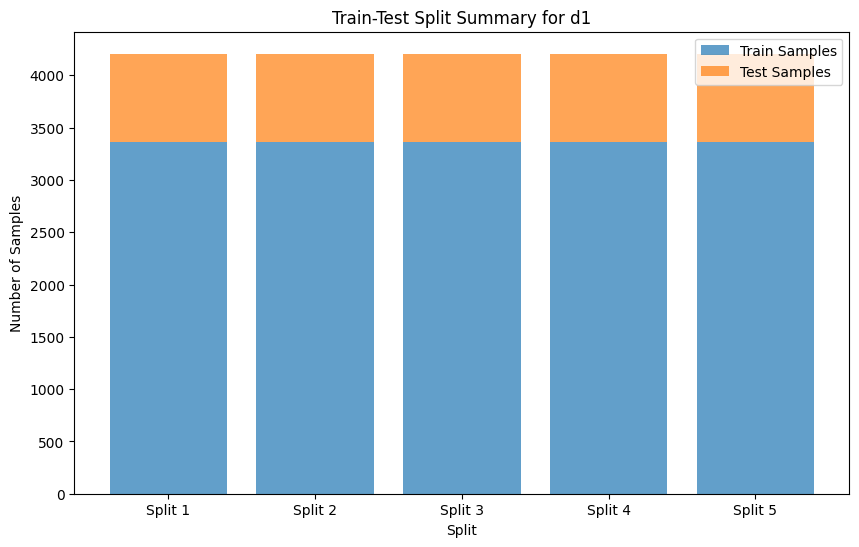

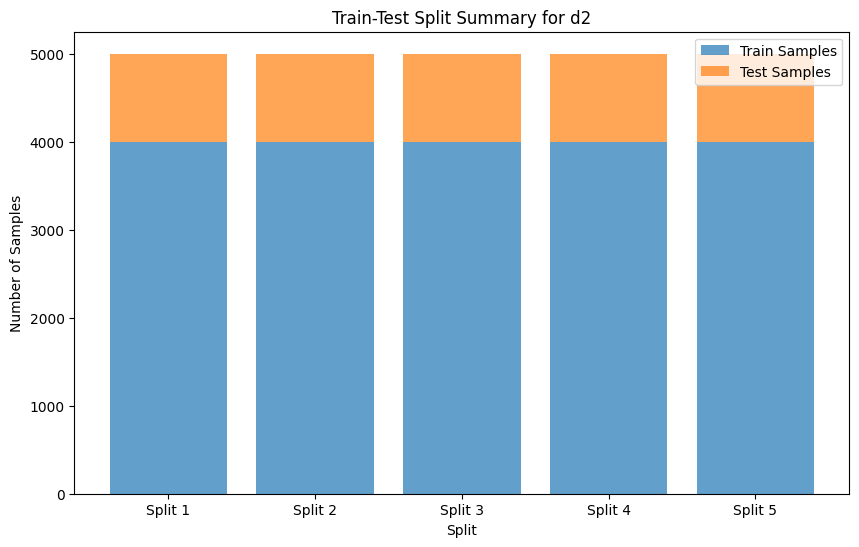

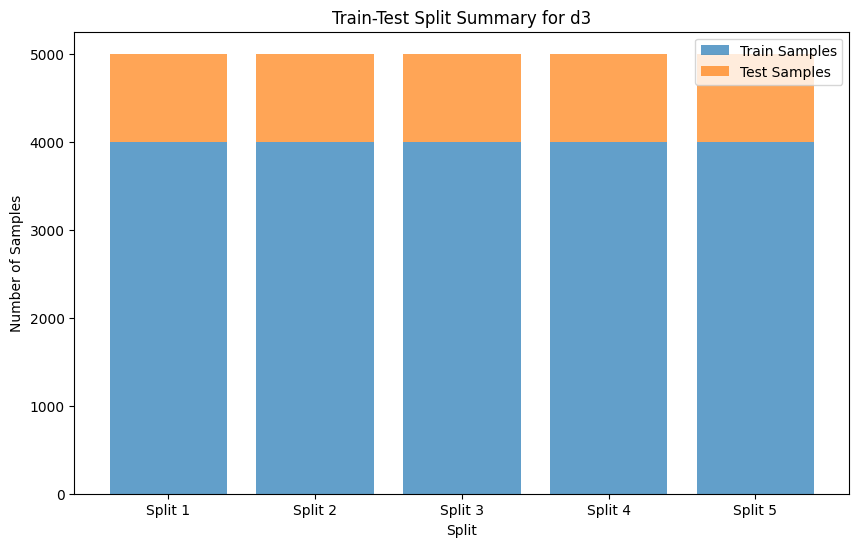

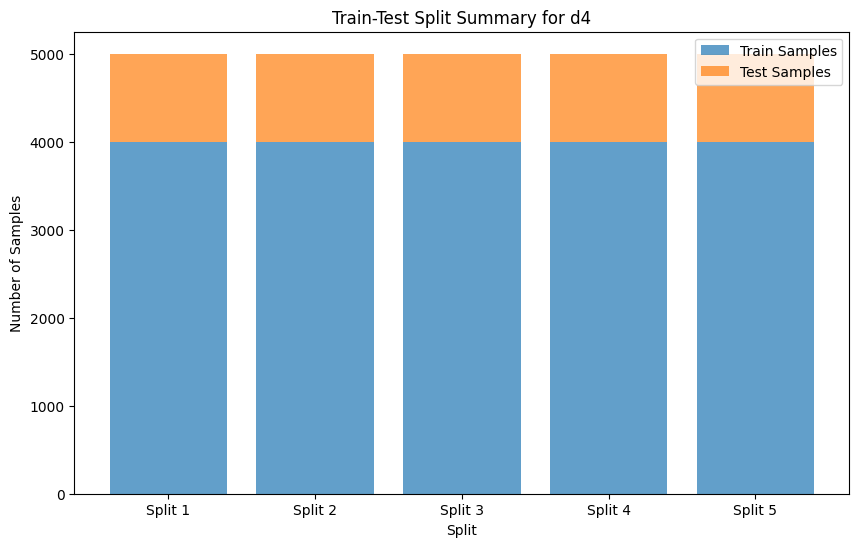

In [ ]:


# Function to plot train-test split summary
def plot_split_summary(train_test_splits, dataset_name):
    # Calculate the number of samples in each split
    num_samples = [len(split['X_train']) + len(split['X_test']) for split in train_test_splits]
    num_train_samples = [len(split['X_train']) for split in train_test_splits]
    num_test_samples = [len(split['X_test']) for split in train_test_splits]

    # Generate x values for the bars
    x_values = np.arange(len(num_samples))

    # Plot the bars
    plt.figure(figsize=(10, 6))
    plt.bar(x_values, num_train_samples, label='Train Samples', alpha=0.7)
    plt.bar(x_values, num_test_samples, bottom=num_train_samples, label='Test Samples', alpha=0.7)

    # Add labels and title
    plt.xlabel('Split')
    plt.ylabel('Number of Samples')
    plt.title(f'Train-Test Split Summary for {dataset_name}')
    plt.xticks(x_values, [f'Split {i+1}' for i in range(len(train_test_splits))])
    plt.legend()

    # Show the plot
    plt.show()

# Plot the train-test split summary for d1
plot_split_summary(train_test_splits_d1, 'd1')

# Plot the train-test split summary for d2
plot_split_summary(train_test_splits_d2, 'd2')

# Plot the train-test split summary for d3
plot_split_summary(train_test_splits_d3, 'd3')

# Plot the train-test split summary for d3
plot_split_summary(train_test_splits_d4, 'd4')


## **4. Modeling**

**Classifiers:**

- **Random Forest**
- **SVM**
- **Naive Bayes**
- **KNN**
- **Decision Tree**
- **MLP**
- **XGBoost**


In [ ]:


# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'SVM': SVC(class_weight='balanced'),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'MLP': MLPClassifier(max_iter=500),
    'XGBoost': XGBClassifier(learning_rate=0.1,objective='binary:logistic',use_label_encoder=False, eval_metric='auc')
}

# Function to train and evaluate a classifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

def train_and_evaluate_classifier(X_train, X_test, y_train, y_test, classifier, classifier_name):
    # Instantiate the classifier
    clf = classifier

    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return {
        'Classifier': classifier_name,
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }


# Run classifiers for d1
results_d1 = []
for split in train_test_splits_d1:
    result = [train_and_evaluate_classifier(split['X_train'], split['X_test'], split['y_train'], split['y_test'], clf, name) for name, clf in classifiers.items()]
    results_d1.extend(result)

# Run classifiers for d2
results_d2 = []
for split in train_test_splits_d2:
    result = [train_and_evaluate_classifier(split['X_train'], split['X_test'], split['y_train'], split['y_test'], clf, name) for name, clf in classifiers.items()]
    results_d2.extend(result)

# Run classifiers for d3
results_d3 = []
for split in train_test_splits_d3:
    result = [train_and_evaluate_classifier(split['X_train'], split['X_test'], split['y_train'], split['y_test'], clf, name) for name, clf in classifiers.items()]
    results_d3.extend(result)

# Run classifiers for d4
results_d4 = []
for split in train_test_splits_d4:
    result = [train_and_evaluate_classifier(split['X_train'], split['X_test'], split['y_train'], split['y_test'], clf, name) for name, clf in classifiers.items()]
    results_d4.extend(result)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


###4.1. Exploring the results

In [ ]:


# Convert results to dataframes
results_d1_df = pd.DataFrame(results_d1)
results_d2_df = pd.DataFrame(results_d2)
results_d3_df = pd.DataFrame(results_d3)
results_d4_df = pd.DataFrame(results_d4)
# Display results
print("Head Results for d1:")
print(results_d1_df.head(7))

print("\nHead Results for d2:")
print(results_d2_df.head(7))

print("\nHead Results for d3:")
print(results_d3_df.head(7))

print("\nHead Results for d4:")
print(results_d4_df.head(7))


Head Results for d1:
      Classifier  Accuracy    Recall  Precision  F1 Score  \
0  Random Forest  0.915677  0.432203   0.927273  0.589595   
1            SVM  0.834917  0.381356   0.405405  0.393013   
2    Naive Bayes  0.859857  0.432203   0.500000  0.463636   
3            KNN  0.876485  0.237288   0.666667  0.350000   
4  Decision Tree  0.850356  0.457627   0.465517  0.461538   
5            MLP  0.844418  0.406780   0.440367  0.422907   
6        XGBoost  0.919240  0.466102   0.916667  0.617978   

        Confusion Matrix  
0   [[720, 4], [67, 51]]  
1  [[658, 66], [73, 45]]  
2  [[673, 51], [67, 51]]  
3  [[710, 14], [90, 28]]  
4  [[662, 62], [64, 54]]  
5  [[663, 61], [70, 48]]  
6   [[719, 5], [63, 55]]  

Head Results for d2:
      Classifier  Accuracy    Recall  Precision  F1 Score  \
0  Random Forest     0.917  0.475177   0.881579  0.617512   
1            SVM     0.824  0.404255   0.382550  0.393103   
2    Naive Bayes     0.872  0.475177   0.553719  0.511450   
3       

In [ ]:
# Convert results to dataframes
results_d1_df = pd.DataFrame(results_d1)
results_d2_df = pd.DataFrame(results_d2)
results_d3_df = pd.DataFrame(results_d3)
results_d4_df = pd.DataFrame(results_d4)

In [ ]:
print(results_d1_df.dtypes)
print(results_d2_df.dtypes)
print(results_d3_df.dtypes)
print(results_d4_df.dtypes)



Classifier           object
Accuracy            float64
Recall              float64
Precision           float64
F1 Score            float64
Confusion Matrix     object
dtype: object
Classifier           object
Accuracy            float64
Recall              float64
Precision           float64
F1 Score            float64
Confusion Matrix     object
dtype: object
Classifier           object
Accuracy            float64
Recall              float64
Precision           float64
F1 Score            float64
Confusion Matrix     object
dtype: object
Classifier           object
Accuracy            float64
Recall              float64
Precision           float64
F1 Score            float64
Confusion Matrix     object
dtype: object


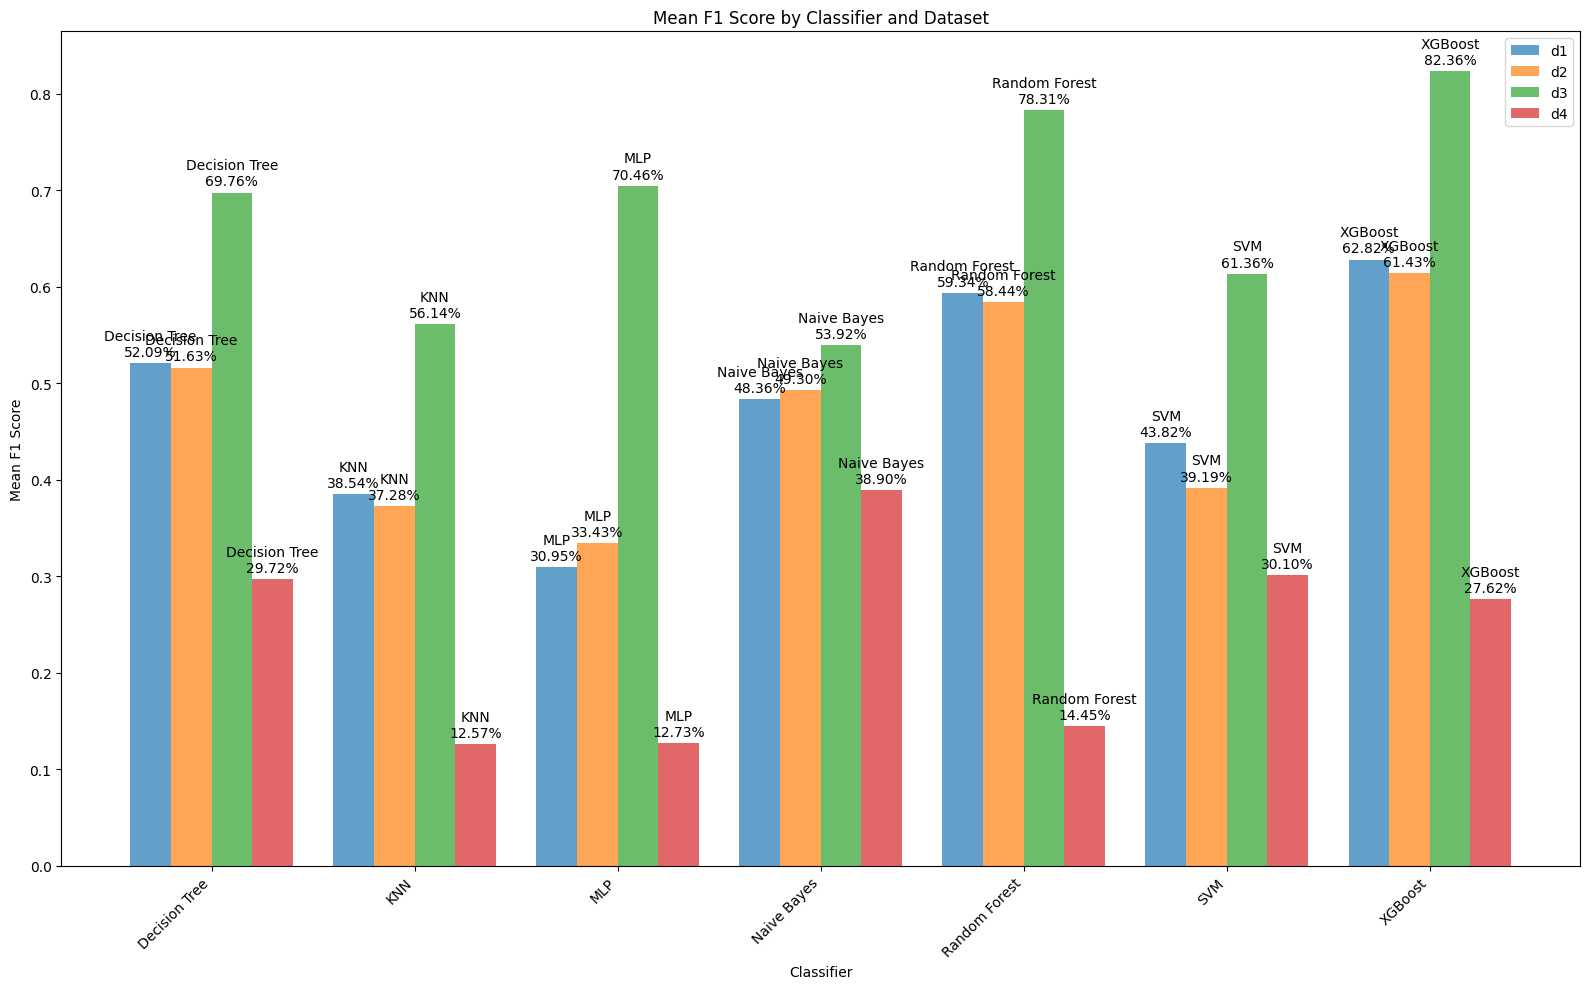

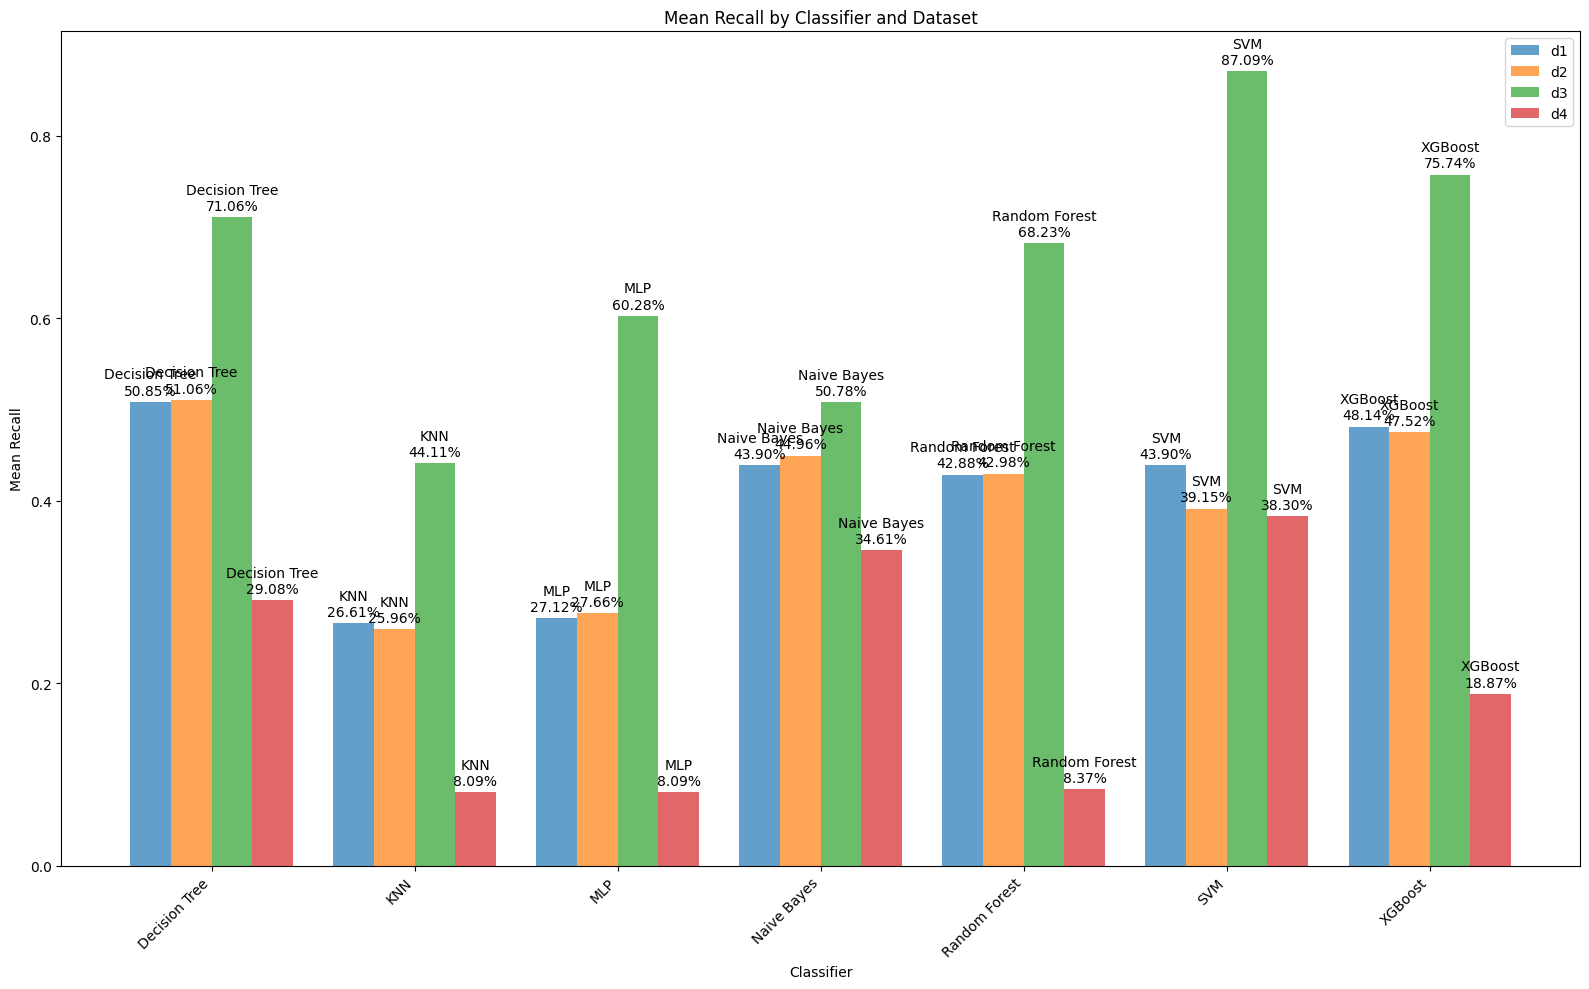

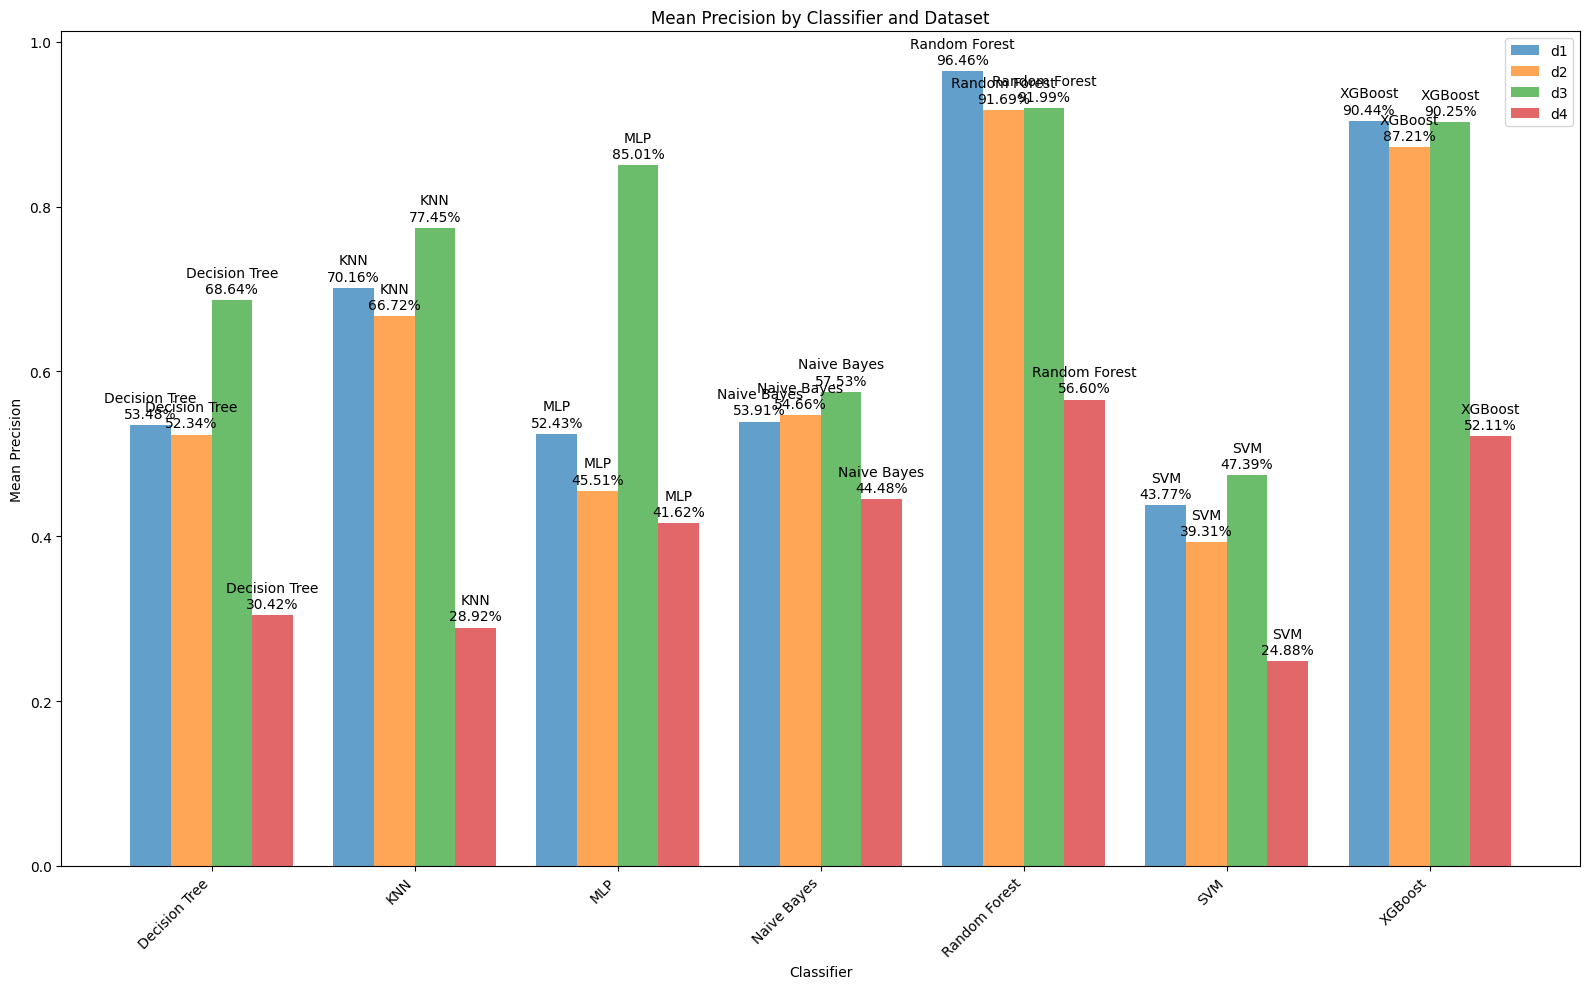

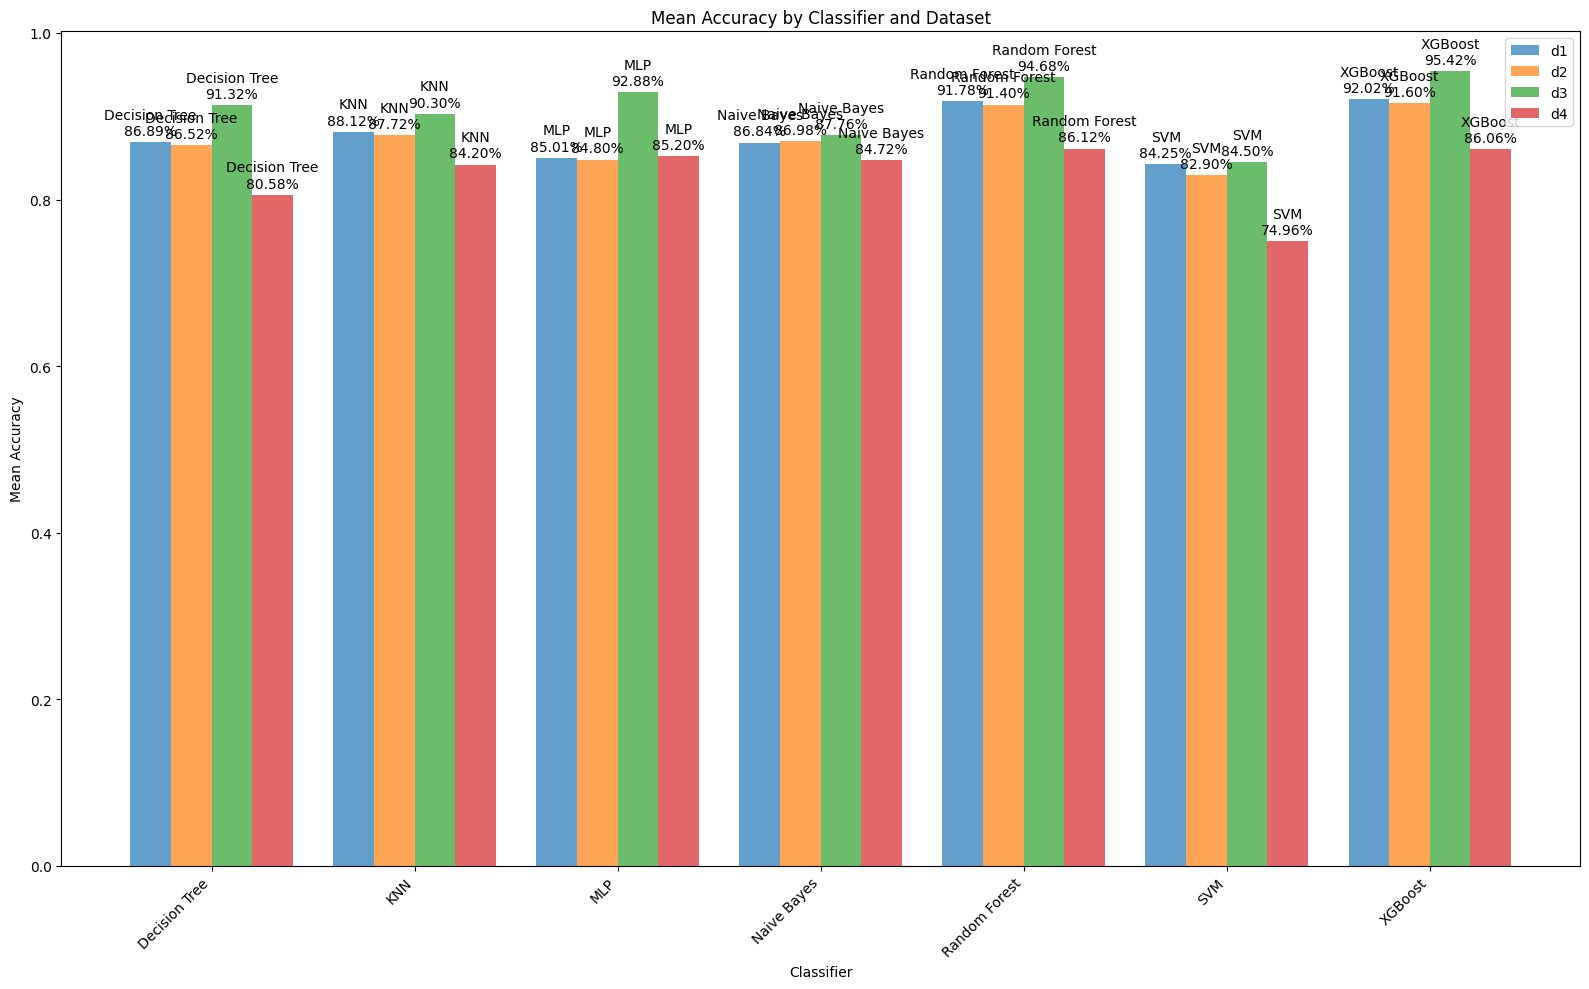

In [ ]:

# Calculate the mean values for each metric (F1, Recall, Precision, Accuracy) for each classifier in each dataset
mean_results_d1 = results_d1_df.groupby('Classifier').agg({'F1 Score': 'mean', 'Recall': 'mean', 'Precision': 'mean', 'Accuracy': 'mean'})
mean_results_d2 = results_d2_df.groupby('Classifier').agg({'F1 Score': 'mean', 'Recall': 'mean', 'Precision': 'mean', 'Accuracy': 'mean'})
mean_results_d3 = results_d3_df.groupby('Classifier').agg({'F1 Score': 'mean', 'Recall': 'mean', 'Precision': 'mean', 'Accuracy': 'mean'})
mean_results_d4 = results_d4_df.groupby('Classifier').agg({'F1 Score': 'mean', 'Recall': 'mean', 'Precision': 'mean', 'Accuracy': 'mean'})


# Set up positions for grouped bar plot
bar_width = 0.2
index = np.arange(len(mean_results_d1))

# Function to plot individual metric
def plot_metric(metric_name, mean_results_d1, mean_results_d2, mean_results_d3, mean_results_d4):
    fig, ax = plt.subplots(figsize=(16, 10))

    bar_d1 = ax.bar(index - bar_width, mean_results_d1[metric_name], bar_width, label='d1', alpha=0.7)
    bar_d2 = ax.bar(index, mean_results_d2[metric_name], bar_width, label='d2', alpha=0.7)
    bar_d3 = ax.bar(index + bar_width, mean_results_d3[metric_name], bar_width, label='d3', alpha=0.7)
    bar_d4 = ax.bar(index + 2 * bar_width, mean_results_d4[metric_name], bar_width, label='d4', alpha=0.7)

    # Annotate the bars with mean metric values
    for bars, results_df in zip([bar_d1, bar_d2, bar_d3, bar_d4], [mean_results_d1, mean_results_d2, mean_results_d3, mean_results_d4]):
        for rect, classifier, value in zip(bars, results_df.index, results_df[metric_name]):
            height = rect.get_height()
            ax.annotate(f'{classifier}\n{value:.2%}', xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    ax.set_xlabel('Classifier')
    ax.set_ylabel(f'Mean {metric_name}')
    ax.set_title(f'Mean {metric_name} by Classifier and Dataset')
    ax.set_xticks(index + bar_width / 2)  # Adjust x-ticks position
    ax.set_xticklabels(mean_results_d1.index)  # Assuming classifiers are the same for all datasets
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1))

    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

# Plot individual metrics
plot_metric('F1 Score', mean_results_d1, mean_results_d2, mean_results_d3, mean_results_d4)
plot_metric('Recall', mean_results_d1, mean_results_d2, mean_results_d3, mean_results_d4)
plot_metric('Precision', mean_results_d1, mean_results_d2, mean_results_d3, mean_results_d4)
plot_metric('Accuracy', mean_results_d1, mean_results_d2, mean_results_d3, mean_results_d4)



Despite the accuracy values being good, they are not real since there is an imbalance. By a random choice, the probability to select the right class is high. Our main metric is the F1 score, and based on that, XGBoost and Random Forest, using the processing of the dataset d3, yielded our best results.

The best F1 scores were:
- **XGBoost:** 82.36%
- **Random Forest:** 78.31%

With that, we decided to fine-tune only those two models.


In [ ]:
# Calculate the mean metrics for each classifier in each dataset
mean_results_d1 = results_d1_df.groupby('Classifier').mean()
mean_results_d2 = results_d2_df.groupby('Classifier').mean()
mean_results_d3 = results_d3_df.groupby('Classifier').mean()
mean_results_d4 = results_d4_df.groupby('Classifier').mean()

# Define the metrics you want to consider
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']

# Initialize a dictionary to store the best mean values for each metric and dataset
best_means = {}

# Loop through each metric
for metric in metrics:
    # Find the classifier with the highest mean value for each dataset
    best_classifier_d1 = mean_results_d1[metric].idxmax()
    best_value_d1 = mean_results_d1.loc[best_classifier_d1, metric]

    best_classifier_d2 = mean_results_d2[metric].idxmax()
    best_value_d2 = mean_results_d2.loc[best_classifier_d2, metric]

    best_classifier_d3 = mean_results_d3[metric].idxmax()
    best_value_d3 = mean_results_d3.loc[best_classifier_d3, metric]

    best_classifier_d4 = mean_results_d4[metric].idxmax()
    best_value_d4 = mean_results_d4.loc[best_classifier_d4, metric]

    # Store the results in the dictionary
    best_means[metric] = {
        'd1': {'Classifier': best_classifier_d1, 'Value': best_value_d1},
        'd2': {'Classifier': best_classifier_d2, 'Value': best_value_d2},
        'd3': {'Classifier': best_classifier_d3, 'Value': best_value_d3},
        'd4': {'Classifier': best_classifier_d4, 'Value': best_value_d4}
    }

# Display the best mean values
for metric, values in best_means.items():
    print(f'Best mean {metric} values:')
    for dataset, info in values.items():
        print(f'{dataset}: {info["Classifier"]} with value {info["Value"]}')
    print('\n')



Best mean Accuracy values:
d1: XGBoost with value 0.920190023752969
d2: XGBoost with value 0.916
d3: XGBoost with value 0.9541999999999999
d4: Random Forest with value 0.8612


Best mean Recall values:
d1: Decision Tree with value 0.5084745762711864
d2: Decision Tree with value 0.5106382978723405
d3: SVM with value 0.8709219858156029
d4: SVM with value 0.3829787234042553


Best mean Precision values:
d1: Random Forest with value 0.9646212121212121
d2: Random Forest with value 0.916937288073124
d3: Random Forest with value 0.9199103391832306
d4: Random Forest with value 0.5659815546772069


Best mean F1 Score values:
d1: XGBoost with value 0.6282278898083729
d2: XGBoost with value 0.6142769383087159
d3: XGBoost with value 0.8235644319619979
d4: Naive Bayes with value 0.38904414757567574




<ipython-input-88-6bdb46c76e0b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_results_d1 = results_d1_df.groupby('Classifier').mean()
<ipython-input-88-6bdb46c76e0b>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_results_d2 = results_d2_df.groupby('Classifier').mean()
<ipython-input-88-6bdb46c76e0b>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_results_d3 = results_d3_df.groupby('Classifier').me

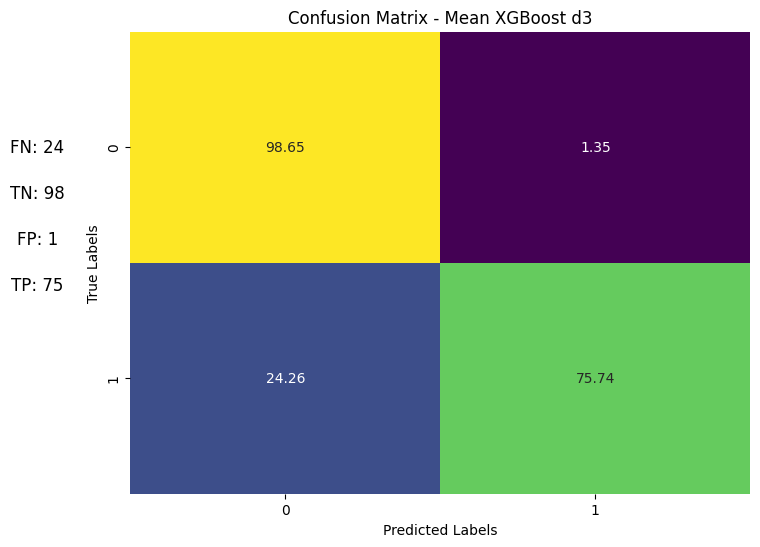

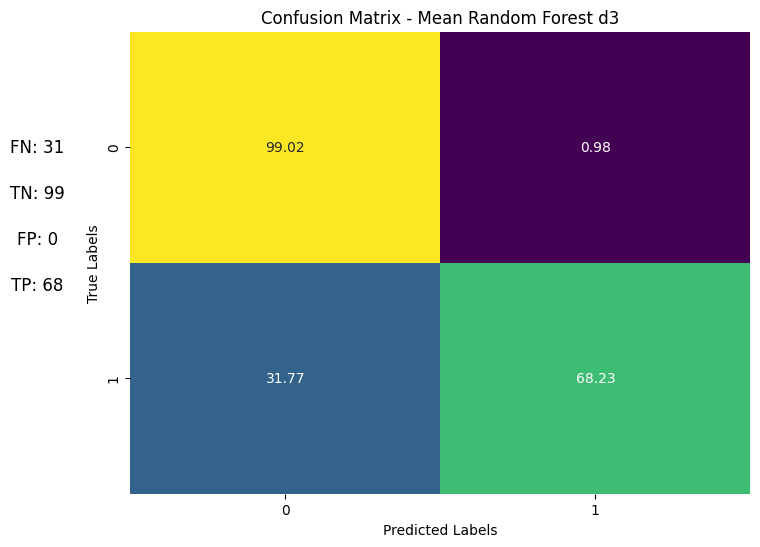

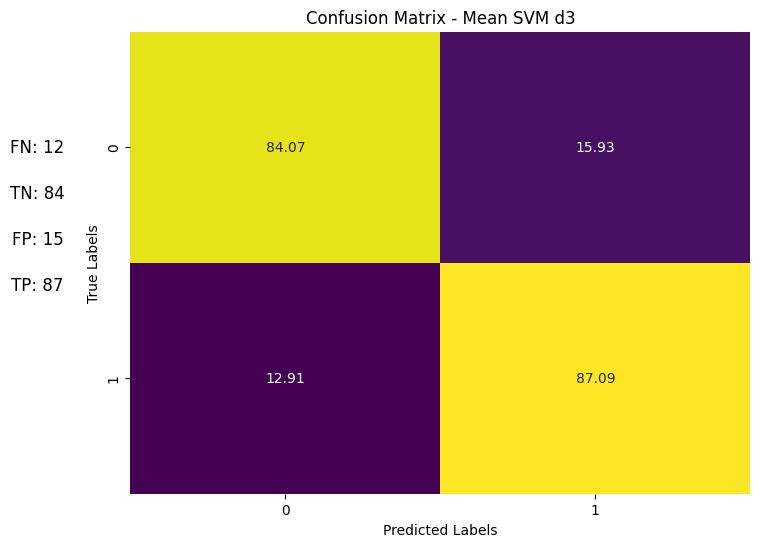

In [ ]:

# Function to plot confusion matrix for results of d1
def plot_confusion_matrix(mean_conf_matrix, classifier_name):
    plt.figure(figsize=(8, 6))

    sns.heatmap(mean_conf_matrix, annot=True, fmt='.2f', cmap='viridis', cbar=False)

    # Extract values from the confusion matrix
    tp = mean_conf_matrix[1, 1]
    fp = mean_conf_matrix[0, 1]
    tn = mean_conf_matrix[0, 0]
    fn = mean_conf_matrix[1, 0]

    plt.text(-0.3, 1.1, f'TP: {int(tp)}', ha='center', va='center', color='black', fontsize=12)
    plt.text(-0.3, 0.9, f'FP: {int(fp)}', ha='center', va='center', color='black', fontsize=12)
    plt.text(-0.3, 0.7, f'TN: {int(tn)}', ha='center', va='center', color='black', fontsize=12)
    plt.text(-0.3, 0.5, f'FN: {int(fn)}', ha='center', va='center', color='black', fontsize=12)

    plt.title(f'Confusion Matrix - Mean {classifier_name} d3')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Calculate mean confusion matrices for XGBoost, Random Forest, and SVM
mean_conf_matrix_xgb = np.mean([result['Confusion Matrix'] for result in results_d3 if result['Classifier'] == 'XGBoost'], axis=0)
mean_conf_matrix_rf = np.mean([result['Confusion Matrix'] for result in results_d3 if result['Classifier'] == 'Random Forest'], axis=0)
mean_conf_matrix_svm = np.mean([result['Confusion Matrix'] for result in results_d3 if result['Classifier'] == 'SVM'], axis=0)

# Normalize the matrices to represent percentages
mean_conf_matrix_xgb_percentage = mean_conf_matrix_xgb / mean_conf_matrix_xgb.sum(axis=1, keepdims=True) * 100
mean_conf_matrix_rf_percentage = mean_conf_matrix_rf / mean_conf_matrix_rf.sum(axis=1, keepdims=True) * 100
mean_conf_matrix_svm_percentage = mean_conf_matrix_svm / mean_conf_matrix_svm.sum(axis=1, keepdims=True) * 100

# Plot confusion matrices
plot_confusion_matrix(mean_conf_matrix_xgb_percentage, 'XGBoost')
plot_confusion_matrix(mean_conf_matrix_rf_percentage, 'Random Forest')
plot_confusion_matrix(mean_conf_matrix_svm_percentage, 'SVM')



###4.2. Fine Tunning best models
**XGBoost**
<br>
**RandomForest**
<br>
**SVM**

Regarding SVM, the results indicate a significantly high recall. Since our emphasis is on predicting the 'yes' label for churn, further improvements should concentrate on enhancing recall.


#### 4.2.1. F1 score grid search

In [ ]:

# Define the parameter grid for XGBoost
param_grid_xgboost = {
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 200, 250,300],
}

# Define the parameter grid for Random Forest
param_grid_random_forest = {
    'n_estimators': [50, 100, 200, 250, 300],
    'max_depth': [None, 10, 20,30],
    'min_samples_split': [2, 5, 10, 15],
}

# Fine-tune XGBoost for d3
xgboost_clf = XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='auc')

grid_search_xgboost = GridSearchCV(xgboost_clf, param_grid_xgboost, scoring='f1', cv=5)
grid_search_xgboost.fit(train_test_splits_d3[0]['X_train'], train_test_splits_d3[0]['y_train'])

# Print the best parameters and F1 score for XGBoost
print("Best parameters for XGBoost:", grid_search_xgboost.best_params_)
print("Best F1 score for XGBoost:", grid_search_xgboost.best_score_)

# Fine-tune Random Forest for d3
random_forest_clf = RandomForestClassifier(random_state=42, class_weight='balanced')

grid_search_random_forest = GridSearchCV(random_forest_clf, param_grid_random_forest, scoring='f1', cv=5)
grid_search_random_forest.fit(train_test_splits_d3[0]['X_train'], train_test_splits_d3[0]['y_train'])

# Print the best parameters and F1 score for Random Forest
print("Best parameters for Random Forest:", grid_search_random_forest.best_params_)
print("Best F1 score for Random Forest:", grid_search_random_forest.best_score_)


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250}
Best F1 score for XGBoost: 0.8227161190729145
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 15, 'n_estimators': 300}
Best F1 score for Random Forest: 0.8174131891752621


In [ ]:


# Define the SVM classifier
svm_classifier = SVC(class_weight='balanced')

# Define the parameter grid for grid search
param_grid_svm = {
    'C': [0.1, 1, 10, 100],         # Regularization parameter
    'kernel': ['linear', 'rbf'],    # Kernel type
    'gamma': ['scale', 'auto'],     # Kernel coefficient
}

# Define the scoring metric (Recall in this case)
scorer = make_scorer(f1_score)

# Create the GridSearchCV object
grid_search_svm = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm, scoring=scorer, cv=5)

# Fit the grid search to your data
grid_search_svm.fit(train_test_splits_d3[0]['X_train'], train_test_splits_d3[0]['y_train'])

# Print the best parameters and recall score
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best f1 score for SVM:", grid_search_svm.best_score_)


Best parameters for SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best f1 score for SVM: 0.6522564968841168


#### 4.2.2. Recall grid search

In [ ]:

# Define the parameter grid for XGBoost
param_grid_xgboost = {
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 200, 250,300],
}

# Define the parameter grid for Random Forest
param_grid_random_forest = {
    'n_estimators': [50, 100, 200, 250, 300],
    'max_depth': [None, 10, 20,30],
    'min_samples_split': [2, 5, 10, 15],
}

# Fine-tune XGBoost for d3
xgboost_clf = XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='auc')

grid_search_xgboost = GridSearchCV(xgboost_clf, param_grid_xgboost, scoring='recall', cv=5)
grid_search_xgboost.fit(train_test_splits_d3[0]['X_train'], train_test_splits_d3[0]['y_train'])

# Print the best parameters and F1 score for XGBoost
print("Best parameters for XGBoost:", grid_search_xgboost.best_params_)
print("Best recall score for XGBoost:", grid_search_xgboost.best_score_)

# Fine-tune Random Forest for d3
random_forest_clf = RandomForestClassifier(random_state=42, class_weight='balanced')

grid_search_random_forest = GridSearchCV(random_forest_clf, param_grid_random_forest, scoring='recall', cv=5)
grid_search_random_forest.fit(train_test_splits_d3[0]['X_train'], train_test_splits_d3[0]['y_train'])

# Print the best parameters and F1 score for Random Forest
print("Best parameters for Random Forest:", grid_search_random_forest.best_params_)
print("Best recall score for Random Forest:", grid_search_random_forest.best_score_)

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250}
Best recall score for XGBoost: 0.7542772861356932
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 15, 'n_estimators': 300}
Best recall score for Random Forest: 0.7790560471976401


In [ ]:

# Define the SVM classifier
svm_classifier = SVC(class_weight='balanced')

# Define the parameter grid for grid search
param_grid_svm = {
    'C': [0.1, 1, 10, 100],         # Regularization parameter
    'kernel': ['linear', 'rbf'],    # Kernel type
    'gamma': ['scale', 'auto'],     # Kernel coefficient
}

# Define the scoring metric (Recall in this case)
scorer = make_scorer(recall_score)

# Create the GridSearchCV object
grid_search_svm = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm, scoring=scorer, cv=5)

# Fit the grid search to your data
grid_search_svm.fit(train_test_splits_d3[0]['X_train'], train_test_splits_d3[0]['y_train'])

# Print the best parameters and recall score
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best Recall score for SVM:", grid_search_svm.best_score_)


Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Recall score for SVM: 0.8692128551467164


#### 4.2.3. Metrics after fine tunning

In [ ]:

# the best parameters
best_params_xgboost = grid_search_xgboost.best_params_
best_params_random_forest = grid_search_random_forest.best_params_
best_params_svm = grid_search_svm.best_params_

# Define classifiers with best parameters
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced', **best_params_random_forest),
    'XGBoost': XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='auc', **best_params_xgboost),
    'SVM': SVC(class_weight='balanced', **best_params_svm)
}

# Function to train and evaluate a classifier
def train_and_evaluate_classifier(X_train, X_test, y_train, y_test, classifier, classifier_name):
    # Instantiate the classifier
    clf = classifier

    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1_value  = f1_score(y_test, y_pred)
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return {
        'Classifier': classifier_name,
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1_value ,
        'Confusion Matrix': cm
    }

# Run classifiers for d3
results_d3 = []
for split in train_test_splits_d3:
    result = [train_and_evaluate_classifier(split['X_train'], split['X_test'], split['y_train'], split['y_test'], clf, name) for name, clf in classifiers.items()]
    results_d3.extend(result)



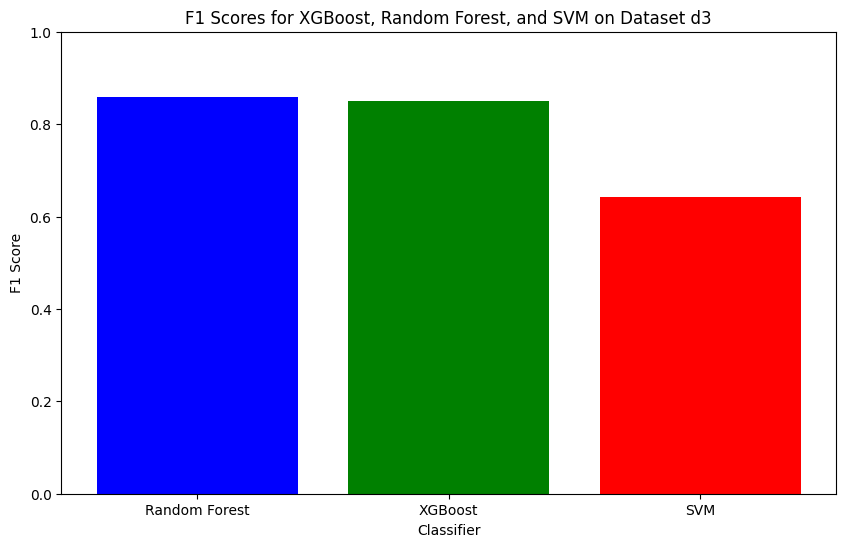

In [ ]:
# Extract F1 scores from the results
classifier_names = [result['Classifier'] for result in results_d3]
f1_scores = [result['F1 Score'] for result in results_d3]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, f1_scores, color=['blue', 'green', 'red'])  # Added 'red' for SVM
plt.title('F1 Scores for XGBoost, Random Forest, and SVM on Dataset d3')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.ylim(0, 1.0)  # Set the y-axis range between 0 and 1 for F1 score
plt.show()


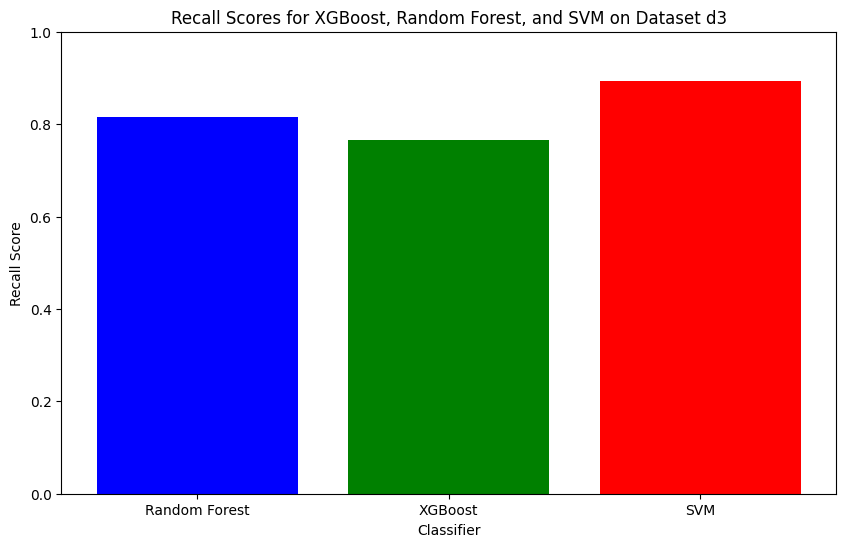

In [ ]:
classifier_names = [result['Classifier'] for result in results_d3]
recall_scores = [result['Recall'] for result in results_d3]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, recall_scores, color=['blue', 'green', 'red'])  # Added 'red' for SVM
plt.title('Recall Scores for XGBoost, Random Forest, and SVM on Dataset d3')
plt.xlabel('Classifier')
plt.ylabel('Recall Score')
plt.ylim(0, 1.0)  # Set the y-axis range between 0 and 1 for Recall score
plt.show()

In [ ]:
# Create a table
table = PrettyTable()
table.field_names = ["Classifier", "Accuracy", "Recall", "Precision", "F1 Score"]

# Populate the table with results
for result in results_d3:
    # Format each value with 2 decimal places
    accuracy = "{:.3f}".format(result['Accuracy'])
    recall = "{:.3}".format(result['Recall'])
    precision = "{:.3f}".format(result['Precision'])
    f1_score = "{:.3f}".format(result['F1 Score'])

    # Add formatted values to the table
    table.add_row([result['Classifier'], accuracy, recall, precision, f1_score])

# Print the table
print(table)



+---------------+----------+--------+-----------+----------+
|   Classifier  | Accuracy | Recall | Precision | F1 Score |
+---------------+----------+--------+-----------+----------+
| Random Forest |  0.945   | 0.766  |   0.831   |  0.797   |
|    XGBoost    |  0.952   | 0.745  |   0.897   |  0.814   |
|      SVM      |  0.838   | 0.887  |   0.461   |  0.607   |
| Random Forest |  0.947   | 0.766  |   0.844   |  0.803   |
|    XGBoost    |  0.955   | 0.759  |   0.907   |  0.826   |
|      SVM      |  0.860   | 0.879  |   0.502   |  0.639   |
| Random Forest |  0.946   | 0.773  |   0.832   |  0.801   |
|    XGBoost    |  0.947   | 0.723  |   0.879   |  0.794   |
|      SVM      |  0.828   | 0.865  |   0.444   |  0.587   |
| Random Forest |  0.962   | 0.816  |   0.906   |  0.858   |
|    XGBoost    |  0.962   | 0.766  |   0.956   |  0.850   |
|      SVM      |  0.860   | 0.894  |   0.502   |  0.643   |
| Random Forest |  0.946   | 0.773  |   0.832   |  0.801   |
|    XGBoost    |  0.948

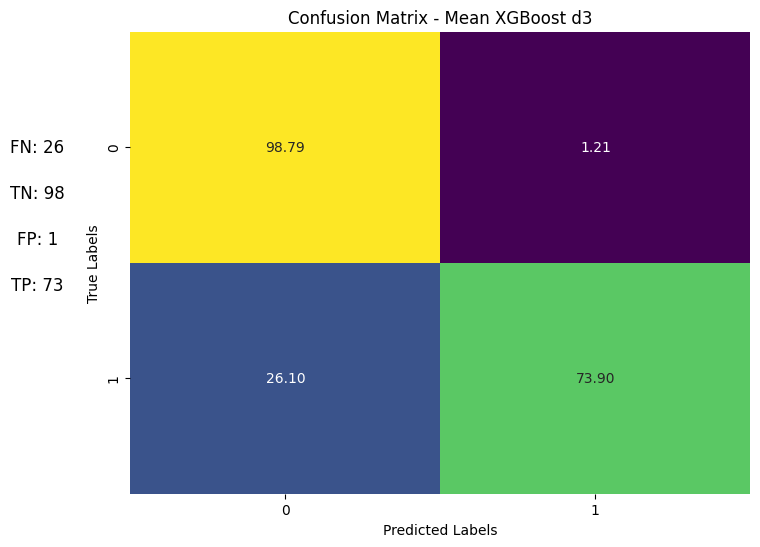

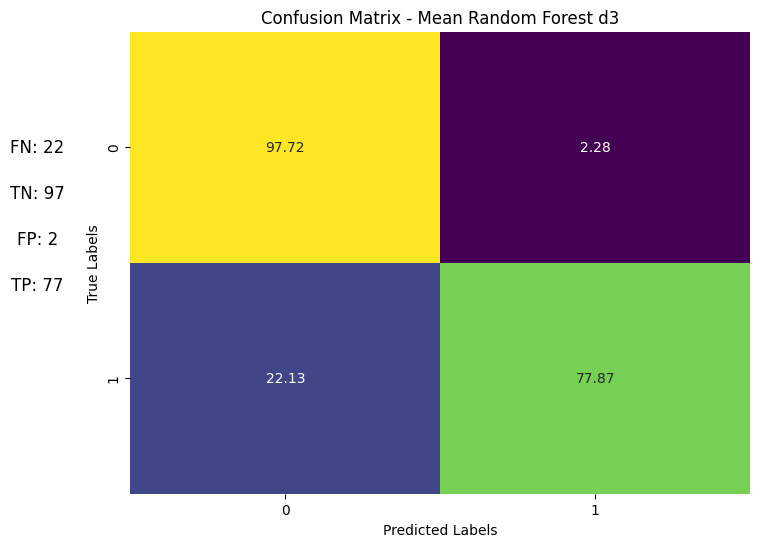

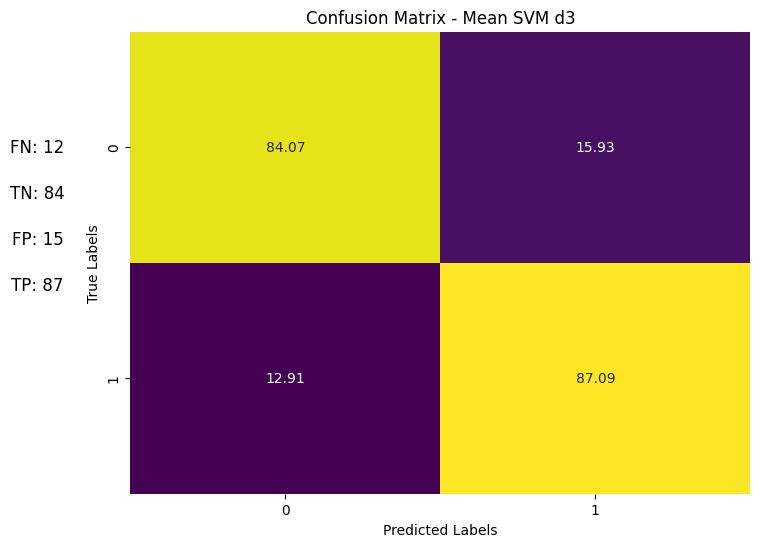

In [ ]:


# Calculate mean confusion matrices for XGBoost, Random Forest, and SVM
mean_conf_matrix_xgb = np.mean([result['Confusion Matrix'] for result in results_d3 if result['Classifier'] == 'XGBoost'], axis=0)
mean_conf_matrix_rf = np.mean([result['Confusion Matrix'] for result in results_d3 if result['Classifier'] == 'Random Forest'], axis=0)
mean_conf_matrix_svm = np.mean([result['Confusion Matrix'] for result in results_d3 if result['Classifier'] == 'SVM'], axis=0)

# Normalize the matrices to represent percentages
mean_conf_matrix_xgb_percentage = mean_conf_matrix_xgb / mean_conf_matrix_xgb.sum(axis=1, keepdims=True) * 100
mean_conf_matrix_rf_percentage = mean_conf_matrix_rf / mean_conf_matrix_rf.sum(axis=1, keepdims=True) * 100
mean_conf_matrix_svm_percentage = mean_conf_matrix_svm / mean_conf_matrix_svm.sum(axis=1, keepdims=True) * 100

# Plot confusion matrices for XGBoost, Random Forest, and SVM
plot_confusion_matrix(mean_conf_matrix_xgb_percentage, 'XGBoost')
plot_confusion_matrix(mean_conf_matrix_rf_percentage, 'Random Forest')
plot_confusion_matrix(mean_conf_matrix_svm_percentage, 'SVM')



## 5.Evaluation and Main Conclusions



## **• What is the best model?**
The one that predicts better the Churn - yes clients is the SVM on dataset d3, it has a TP of 87%.

## **• What do you think that the business can gain from your data science effort?**
Understanding the identity of these clients allows for targeted efforts to retain them. Given their smaller number compared to those who don't churn, this focused approach is cost-effective in identifying and retaining valuable clients.

## **• What are the lessons learned?**
It is crucial to carefully consider the chosen metrics, experiment with various algorithms, ensure a thorough understanding of the data, and select techniques that align best with your specific problem.

## **• What is your summary of the achieved results?**

The most effective data processing techniques among those tested were using the input median for NaN values and transforming with min-max scaling and log transformation. Traditional accuracy is not suitable for imbalanced datasets; instead, the F1 score emerged as a valuable metric for selecting robust models.

Recall was a crucial parameter in fine-tuning the best models, given our specific focus on predicting churn (Yes). SVM excelled in predicting churn (Yes), while XGBoost and RandomForest demonstrated strong performance in predicting churn as a whole, though not surpassing SVM for the churn (Yes) class.

The results are highly dependent on the chosen data processing methods. Depending on the business success criteria, the choice of the model may vary. Despite having lower recall values, RandomForest and XGBoost displayed robust results with higher precision and F1 scores, making them potential considerations for the final model.

